In [1]:
#Importamos las librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp

In [2]:
#Exportacion csv exportaciones por DOP
df_export_dop = pd.read_csv(r"C:\Users\usuari\Desktop\Proyecto_final\data\ComercializacionWin2.csv")

### Visión general de los datos

In [3]:
# Muestra la cantidad de filas y columnas del archivo
df_export_dop.shape    

(935, 49)

In [4]:
# Muestra los primeros 5 registros del archivo
df_export_dop.head()

DOPs   Año  Alemania  Austria  Bélgica  Bulgaria  Chipre  \
0  Abadía Retuerta  2023        40        3        9         1       0   
1            Abona  2023         0        0        0         0       0   
2           Alella  2023         0        0        0         0       0   
3         Alicante  2023      7391      120     1633        67       0   
4          Almansa  2023      2440       11      764         4       0   

   Croacia  Dinamarca  Eslovaquia  ...  Venezuela  Resto América  Corea  \
0        0          7           0  ...          0             58      0   
1        0          0           0  ...          0              0      0   
2        0          0           0  ...          0              0      0   
3        0        482           3  ...          0            212    202   
4        0        846           0  ...          0            135    529   

   China  India  Japón  Resto Asia  Australia  Resto Oceanía  Otros  
0     13      0     12           0          0              0      0  
1      0      0      0           0          0              0      0  
2      0      0      0           0          0              0      0  
3   1163      0    817         730         32              7   1946  
4   1768      0    990         868         27              0      0  

[5 rows x 49 columns]

### Cambio de la organización del df_export_dop para que sea más práctico trabajar con él. Las columnas 'DOPs' y 'Año' se mantienen, y se crea una nueva columna 'País' donde se concentran todos los países y una nueva columna 'Ventas' que contiene las ventas por 'DOPs', 'Año' y 'País'

In [5]:
df_melted = df_export_dop.melt(id_vars=['DOPs', "Año"], var_name='País', value_name='Ventas')

### Visión general de los datos del df_melted

In [6]:
# Muestra la cantidad de filas y columnas del archivo
df_melted.shape    

(43945, 4)

In [7]:
# Muestra los primeros 5 registros del archivo
df_melted.head()

DOPs   Año      País  Ventas
0  Abadía Retuerta  2023  Alemania      40
1            Abona  2023  Alemania       0
2           Alella  2023  Alemania       0
3         Alicante  2023  Alemania    7391
4          Almansa  2023  Alemania    2440

In [8]:
# Que informacion tiene cada columna del df_melted
df_melted['DOPs'].unique()

array(['Abadía Retuerta', 'Abona', 'Alella', 'Alicante', 'Almansa',
       'Arlanza', 'Arribes', 'Aylés', 'Bierzo', 'Binissalem', 'Bolandin',
       'Bullas', 'Calatayud', 'Calzadilla', 'Campo de Borja',
       'Campo de la Guardia', 'Cangas', 'Cariñena', 'Casa del Blanco',
       'Cataluña', 'Cava', 'Cebreros', 'Chacolí de Álava',
       'Chacolí de Bizkaia', 'Chacolí de Getaria', 'Chozas Carrascal',
       'Cigales', 'Conca de Barberá', 'Condado de Huelva',
       'Costers del Segre', 'Dehesa del Carrizal', 'Dehesa Peñalba',
       'Dominio de Valdepusa', 'El Hierro', 'El Terrerazo', 'Empordà',
       'Finca Élez', 'Gran Canaria', 'Granada', 'Guijoso',
       'Islas Canarias', 'Jerez-Xérès-Sherry', 'Jumilla', 'La Gomera',
       'La Mancha', 'La Palma', 'Lanzarote', 'Lebrija', 'León',
       'Los Balagueses', 'Málaga', 'Manchuela', 'Manzanilla S.B.',
       'Méntrida', 'Mondéjar', 'Monterrei', 'Montilla-Moriles',
       'Montsant', 'Navarra', 'Pago de Arínzano', 'Pago de Otazu',
    

In [9]:
# Que informacion tiene cada columna del df_melted
df_melted['Año'].unique()

array([2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014])

In [10]:
# Que informacion tiene cada columna del df_melted
df_melted['País'].unique()

array(['Alemania', 'Austria', 'Bélgica', 'Bulgaria', 'Chipre', 'Croacia',
       'Dinamarca', 'Eslovaquia', 'Eslovenia', 'Estonia', 'Finlandia',
       'Francia', 'Grecia', 'Holanda', 'Hungria', 'Irlanda', 'Italia',
       'Letonia', 'Lituania', 'Luxemburgo', 'Mlata', 'Polonia',
       'Portugal', 'Repùblica Checa', 'Rumania', 'Suecia', 'Noruega',
       'Suiza', 'Reino Unido', 'Rusia', 'Resto Europa no E.U.',
       'Argentina', 'Brasil', 'Canadá', 'Colombia', 'EE.UU.', 'México',
       'Venezuela', 'Resto América', 'Corea', 'China', 'India', 'Japón',
       'Resto Asia', 'Australia', 'Resto Oceanía', 'Otros'], dtype=object)

In [11]:
# Muestra estructura del dfvino
df_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43945 entries, 0 to 43944
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DOPs    43945 non-null  object
 1   Año     43945 non-null  int64 
 2   País    43945 non-null  object
 3   Ventas  43945 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.3+ MB


In [12]:
# Muestra los tipos de datos numéricos
df_melted.describe()

Año         Ventas
count  43945.000000   43945.000000
mean    2018.621390    1091.207396
std        2.892763   10074.472872
min     2014.000000       0.000000
25%     2016.000000       0.000000
50%     2019.000000       0.000000
75%     2021.000000      48.000000
max     2023.000000  868666.000000

In [13]:
# Muestra el tipo de variable de cada columna
df_melted.dtypes

DOPs      object
Año        int64
País      object
Ventas     int64
dtype: object

In [14]:
# Comprobación de nulos
df_melted.isnull().sum()

DOPs      0
Año       0
País      0
Ventas    0
dtype: int64

In [15]:
# Comprobación de duplicados
df_melted.duplicated().sum()

np.int64(0)

### Correcciones de datos

In [16]:
#Cambio de tipo de la variable Año a string
df_melted['Año'] = df_melted['Año'].astype(str)

##### En un punto del primer análisis se encontró una información que no tenía relación con los datos, era una venta que del año 2022 al año 2023 crecía de manera exponencial poniéndose al nivel del país que más vendía. El problema venía de la fuente primaria en relación a una 'DOPSs' específica, 'Cava', así que se resolvió substituyendo el dato por la media de los años anteriores. Al no tratarse de un valor número como tal ni tampoco se puede considerar un outlier ya que un fallo de los datos primarios, se mostrará en este apartado para después poder ejecutar el código de manera ordenada.

In [17]:
#Países a los que más se exporta por año   
top_10_paises_por_año_sincorregir = df_melted.groupby(["Año", "País"])["Ventas"].sum().reset_index()

# Ordenamos por Año y Ventas, de mayor a menor
top_10_paises_por_año_sincorregir = top_10_paises_por_año_sincorregir.sort_values(by=["Año", "Ventas"], ascending=[True, False])

# Seleccionamos los 10 países con más ventas por cada año
top_10_paises_por_año_sincorregir = top_10_paises_por_año_sincorregir.groupby("Año").head(10)

print(top_10_paises_por_año_sincorregir)

      Año         País   Ventas
36   2014  Reino Unido  1063354
0    2014     Alemania   941332
14   2014       EE.UU.   461550
6    2014      Bélgica   355174
21   2014      Holanda   289454
..    ...          ...      ...
429  2023      Bélgica   260200
466  2023        Rusia   198056
467  2023       Suecia   164810
430  2023       Canadá   153852
442  2023      Francia   132214

[100 rows x 3 columns]


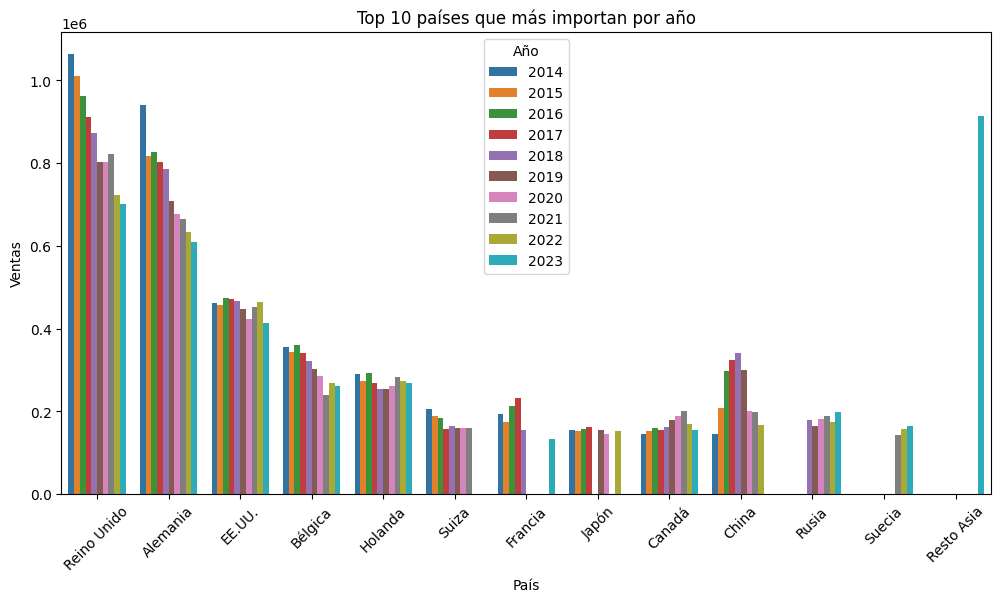

In [18]:
# Gráfico de los países a los que más se exporta por año  
# Configuración del gráfico
plt.figure(figsize=(12,6))
sns.barplot(data=top_10_paises_por_año_sincorregir, x="País", y="Ventas", hue="Año", dodge=True)

plt.title("Top 10 países que más importan por año")
plt.xlabel("País")
plt.ylabel("Ventas")
plt.xticks(rotation=45)
plt.legend(title="Año")
plt.show()

##### Es en este gráfico donde se encontró el dato. Llama la atención que la región 'Resto Asia' de un año a otro no solamente pase a ser una exportadora top 10, sino que se pone a la altura de las mayores exportadoras como son Reino Unido y Alemania. Debido a esto, como se ha mencionado anteriormente se decide corregir el dato con la media de los años anteriores

In [19]:
# Visualización de las exportaciones totales por año a 'Resto Asia' ya que el número de ventas se dispara y no cuadra.
# Filtrar por el país específico
pais_especifico_sincorregir = "Resto Asia"  # Cambia esto por el país que quieres analizar
dfsegundo_filtrado = df_melted[df_melted["País"] == pais_especifico_sincorregir]

# Agrupar por año y sumar las ventas
ventas_por_año_segundodf = dfsegundo_filtrado.groupby("Año")["Ventas"].sum()

print(ventas_por_año_segundodf)

Año
2014     43805
2015     45626
2016     49696
2017     62320
2018     51950
2019     51643
2020     50918
2021     45398
2022     65646
2023    914831
Name: Ventas, dtype: int64


In [20]:
# Visualización de las exportaciones por DOPs y Año a Resto Asia para señalar el aumento exponencial del dato
# Filtrar por País que contiene 'Asia' y Años 2020-2023
df_DOPs_filtrado = df_melted[
    (df_melted['País'].str.contains('Asia', case=False, na=False)) & 
    (df_melted['Año'].isin(['2020', '2021', '2022', '2023']))
]

# Crear la tabla con DOPs como índice y años como columnas
tabla_ventas_asia = df_DOPs_filtrado.pivot_table(
    index="DOPs", 
    columns="Año", 
    values="Ventas", 
    aggfunc="sum",  # Sumar ventas por año
    fill_value=0  # Reemplazar NaN con 0 si no hubo ventas
)

# Filtrar DOPs con al menos una venta > 0
tabla_ventas_asia = tabla_ventas_asia.loc[tabla_ventas_asia.sum(axis=1) > 0]

# Ordenar por ventas totales (suma de todas las columnas)
tabla_ventas_asia["Total"] = tabla_ventas_asia.sum(axis=1)
tabla_ventas_asia = tabla_ventas_asia.sort_values(by="Total", ascending=False).drop(columns=["Total"])

# Mostrar la tabla
print(tabla_ventas_asia)


Año            2020   2021   2022    2023
DOPs                                     
Cava          14188  12066  13369  868666
Rioja          8169  11166  10691   11411
Jumilla        1494   2193  15131   14308
La Mancha      9711   2481   2230    2064
Cataluña       2725   3139   3825    3467
...             ...    ...    ...     ...
El Terrerazo      0      2      0       3
La Palma          0      3      0       0
Abona             0      2      0       0
Arlanza           0      0      0       2
Lanzarote         0      0      0       2

[71 rows x 4 columns]


In [21]:
# Corrección del dato a través de la media de ventas de 'Cava' en 'Resto Asia' de 2014 a 2022
# Filtramos el DataFrame con las condiciones especificadas
df_filtered_media = df_melted[
    (df_melted['DOPs'] == 'Cava') &
    (df_melted['Año'].isin([str(year) for year in range(2014, 2023)])) &
    (df_melted['País'] == 'Resto Asia')
]

# Calculamos la media de la columna 'Ventas'
media_ventas = df_filtered_media['Ventas'].mean()

print("La media de ventas es:", media_ventas.round())

La media de ventas es: 12295.0


In [22]:
# Subistitución del valor incorrecto por la media calculada

df_melted.loc[(df_melted['Año'] == '2023') & 
              (df_melted['País'] == 'Resto Asia') & 
              (df_melted['DOPs'] == 'Cava'), 'Ventas'] = 12295

In [23]:
#Visualiaziación de la corrección

df_melted.loc[(df_melted['Año'] == '2023') & 
              (df_melted['País'] == 'Resto Asia') & 
              (df_melted['DOPs'] == 'Cava')]

DOPs   Año        País  Ventas
40225  Cava  2023  Resto Asia   12295

In [24]:
# Visualización de las exportaciones totales por año a 'Resto Asia' con el dato corregido
# Filtrar por el país específico
pais_especifico_corregido = "Resto Asia"  
dfsegundo_filtrado_corregido = df_melted[df_melted["País"] == pais_especifico_corregido]

# Agrupar por año y sumar las ventas
ventas_por_año_segundodf_corregido = dfsegundo_filtrado_corregido.groupby("Año")["Ventas"].sum()

print(ventas_por_año_segundodf_corregido)

Año
2014    43805
2015    45626
2016    49696
2017    62320
2018    51950
2019    51643
2020    50918
2021    45398
2022    65646
2023    58460
Name: Ventas, dtype: int64


### Creación de un nuevo df con el dato del 'Resto Asia' cambiado.

In [25]:
df_exportacion_spain_DOP = df_melted.copy()
df_exportacion_spain_DOP['Año'] = df_exportacion_spain_DOP['Año'].astype('object')
df_exportacion_spain_DOP.to_csv(r"C:\Users\usuari\Desktop\Proyecto_final\data\exportacion_spain.csv", index=False)

In [26]:
#Exportacion csv exportaciones por DOP
df_exportacion_spain = pd.read_csv(r"C:\Users\usuari\Desktop\Proyecto_final\data\exportacion_spain.csv")

### Visión general de los datos del df_exportacion_spain

In [27]:
df_exportacion_spain.shape

(43945, 4)

In [28]:
df_exportacion_spain.head()

DOPs   Año      País  Ventas
0  Abadía Retuerta  2023  Alemania      40
1            Abona  2023  Alemania       0
2           Alella  2023  Alemania       0
3         Alicante  2023  Alemania    7391
4          Almansa  2023  Alemania    2440

In [29]:
# Muestra estructura del dfvino
df_exportacion_spain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43945 entries, 0 to 43944
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DOPs    43945 non-null  object
 1   Año     43945 non-null  int64 
 2   País    43945 non-null  object
 3   Ventas  43945 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.3+ MB


In [30]:
# Muestra los tipos de datos numéricos
df_exportacion_spain.describe()

Año         Ventas
count  43945.000000   43945.000000
mean    2018.621390    1071.720059
std        2.892763    9185.269742
min     2014.000000       0.000000
25%     2016.000000       0.000000
50%     2019.000000       0.000000
75%     2021.000000      48.000000
max     2023.000000  364662.000000

In [31]:
# Muestra el tipo de variable de cada columna
df_exportacion_spain.dtypes

DOPs      object
Año        int64
País      object
Ventas     int64
dtype: object

In [32]:
# Comprobación de nulos
df_exportacion_spain.isnull().sum()

DOPs      0
Año       0
País      0
Ventas    0
dtype: int64

In [33]:
# Comprobación de duplicados
df_exportacion_spain.duplicated().sum()

np.int64(0)

In [34]:
# Que informacion tiene cada columna del df_melted
df_exportacion_spain['DOPs'].unique()

array(['Abadía Retuerta', 'Abona', 'Alella', 'Alicante', 'Almansa',
       'Arlanza', 'Arribes', 'Aylés', 'Bierzo', 'Binissalem', 'Bolandin',
       'Bullas', 'Calatayud', 'Calzadilla', 'Campo de Borja',
       'Campo de la Guardia', 'Cangas', 'Cariñena', 'Casa del Blanco',
       'Cataluña', 'Cava', 'Cebreros', 'Chacolí de Álava',
       'Chacolí de Bizkaia', 'Chacolí de Getaria', 'Chozas Carrascal',
       'Cigales', 'Conca de Barberá', 'Condado de Huelva',
       'Costers del Segre', 'Dehesa del Carrizal', 'Dehesa Peñalba',
       'Dominio de Valdepusa', 'El Hierro', 'El Terrerazo', 'Empordà',
       'Finca Élez', 'Gran Canaria', 'Granada', 'Guijoso',
       'Islas Canarias', 'Jerez-Xérès-Sherry', 'Jumilla', 'La Gomera',
       'La Mancha', 'La Palma', 'Lanzarote', 'Lebrija', 'León',
       'Los Balagueses', 'Málaga', 'Manchuela', 'Manzanilla S.B.',
       'Méntrida', 'Mondéjar', 'Monterrei', 'Montilla-Moriles',
       'Montsant', 'Navarra', 'Pago de Arínzano', 'Pago de Otazu',
    

In [35]:
# Que informacion tiene cada columna del df_melted
df_exportacion_spain['Año'].unique()

array([2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014])

In [36]:
# Que informacion tiene cada columna del df_melted
df_exportacion_spain['País'].unique()

array(['Alemania', 'Austria', 'Bélgica', 'Bulgaria', 'Chipre', 'Croacia',
       'Dinamarca', 'Eslovaquia', 'Eslovenia', 'Estonia', 'Finlandia',
       'Francia', 'Grecia', 'Holanda', 'Hungria', 'Irlanda', 'Italia',
       'Letonia', 'Lituania', 'Luxemburgo', 'Mlata', 'Polonia',
       'Portugal', 'Repùblica Checa', 'Rumania', 'Suecia', 'Noruega',
       'Suiza', 'Reino Unido', 'Rusia', 'Resto Europa no E.U.',
       'Argentina', 'Brasil', 'Canadá', 'Colombia', 'EE.UU.', 'México',
       'Venezuela', 'Resto América', 'Corea', 'China', 'India', 'Japón',
       'Resto Asia', 'Australia', 'Resto Oceanía', 'Otros'], dtype=object)

### Correcciones de datos

In [37]:
#Cambio de tipo de la variable Año a string
df_exportacion_spain['Año'] = df_exportacion_spain['Año'].astype(str)

In [38]:
#Corrección de nombre de Mlta por Malta
df_exportacion_spain = df_exportacion_spain.rename(columns={'Mlata': 'Malta'})

### Visualización de valores atípicos con Boxplot

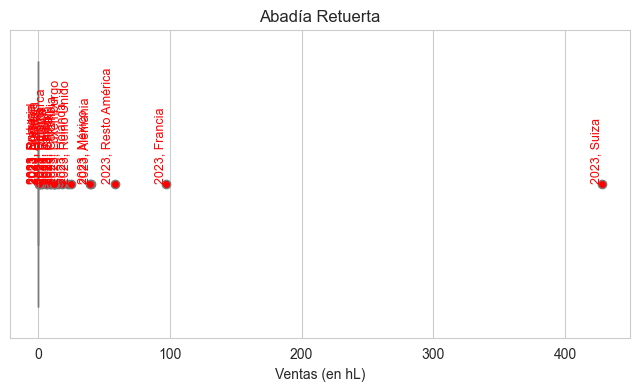

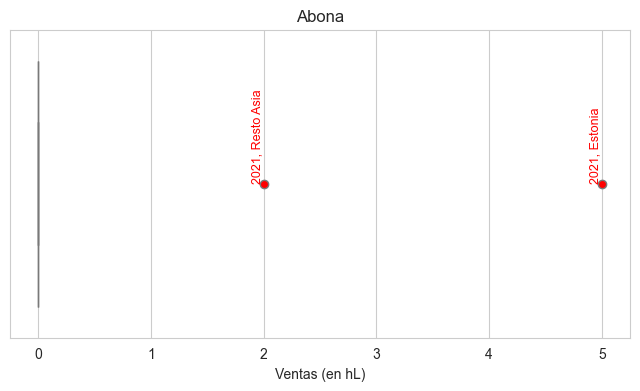

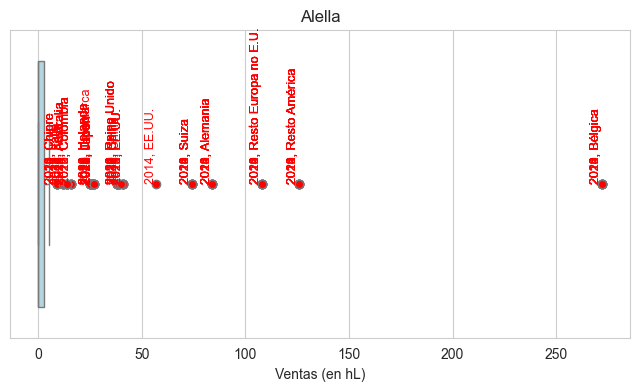

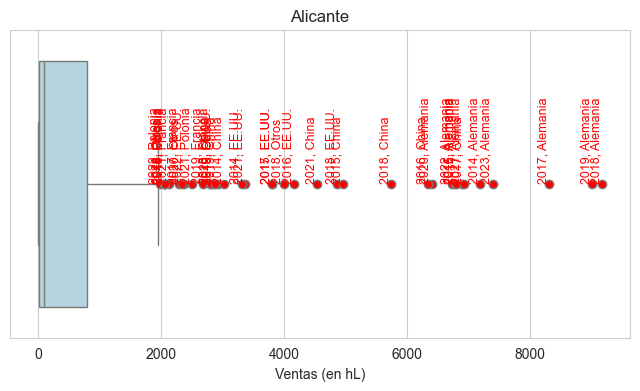

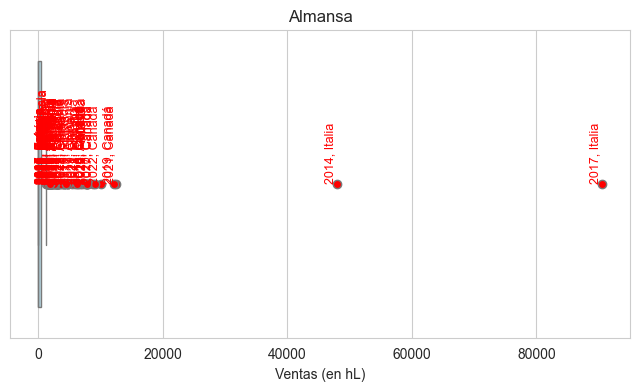

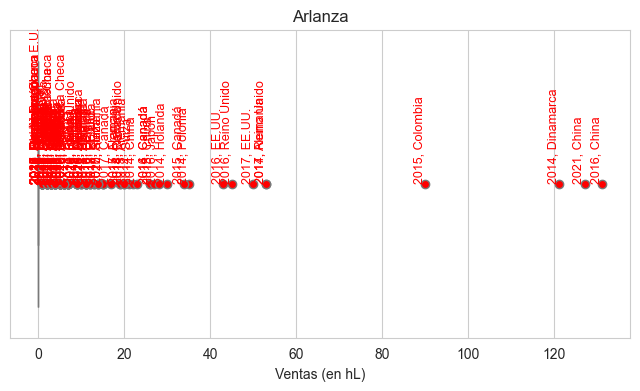

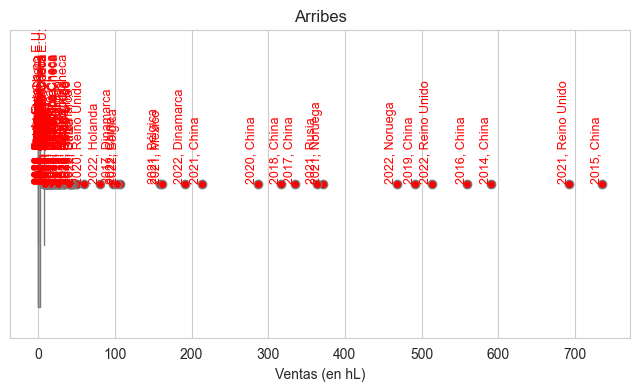

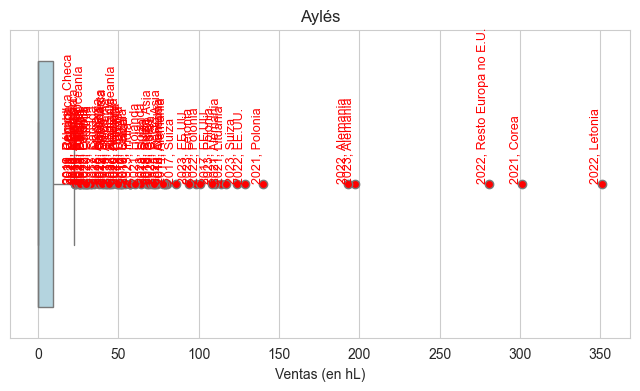

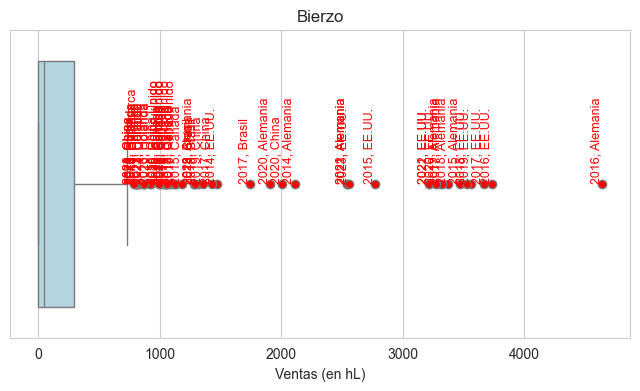

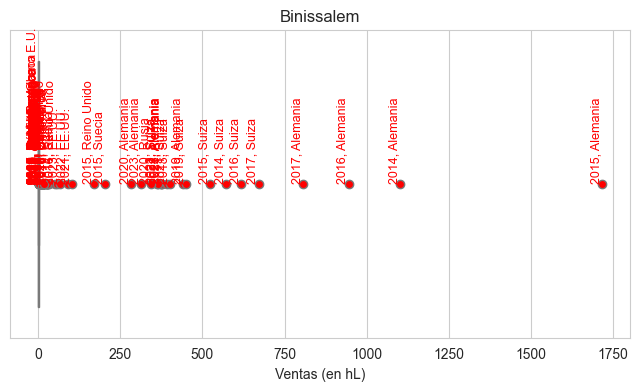

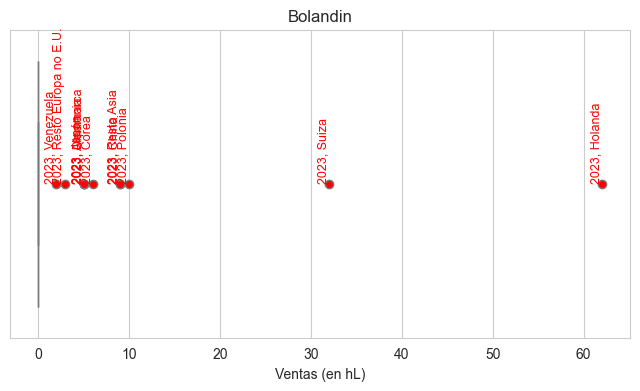

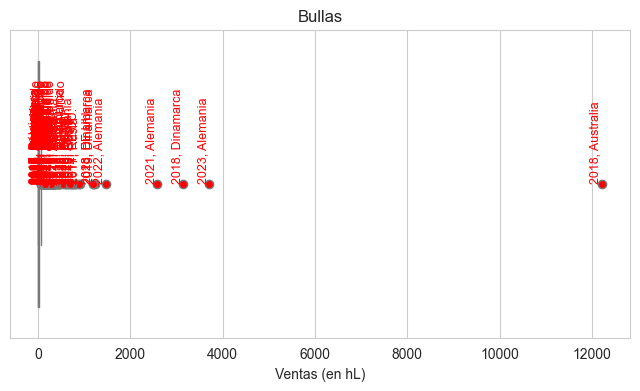

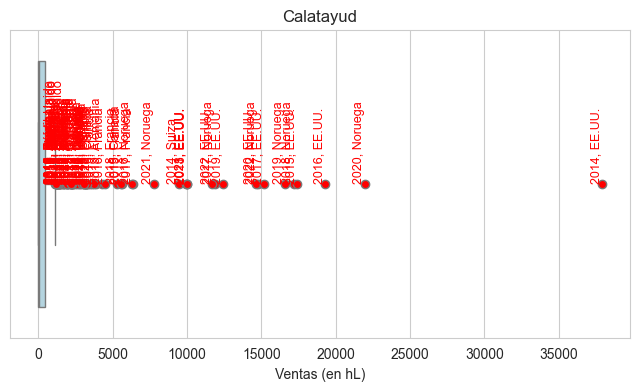

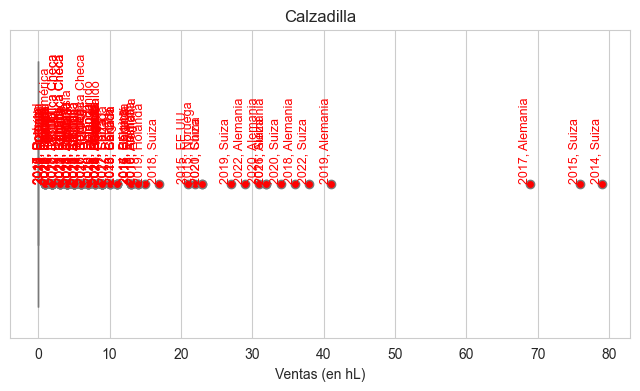

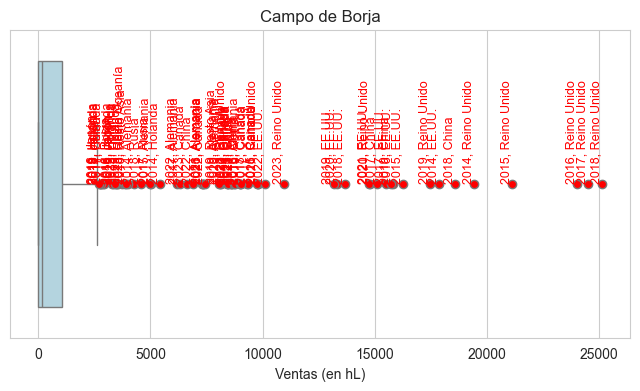

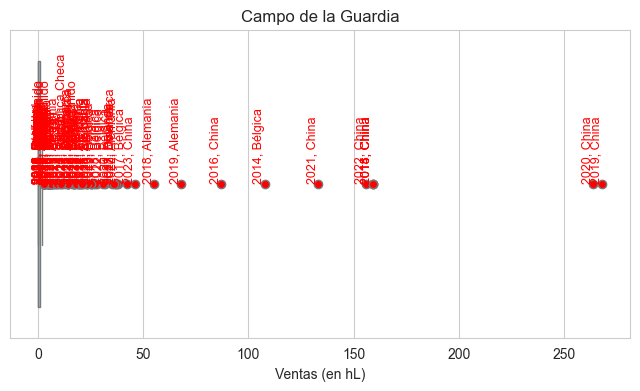

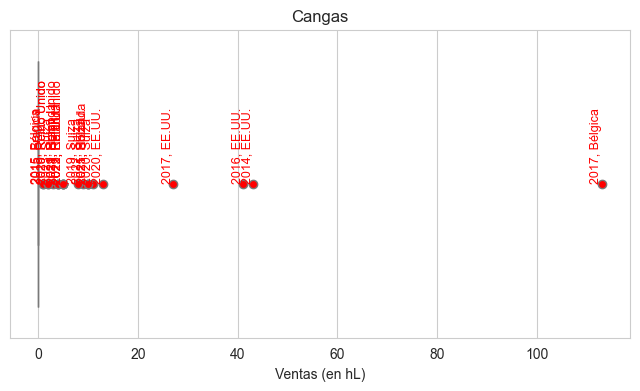

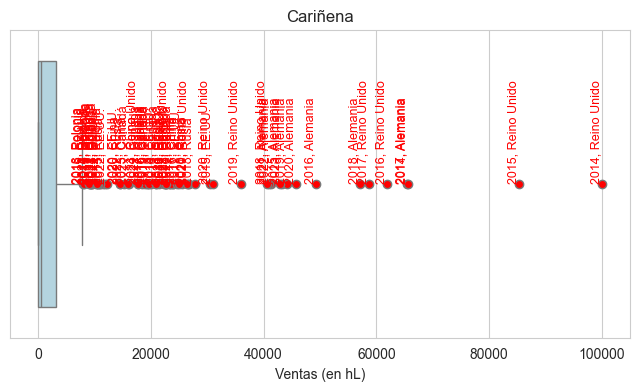

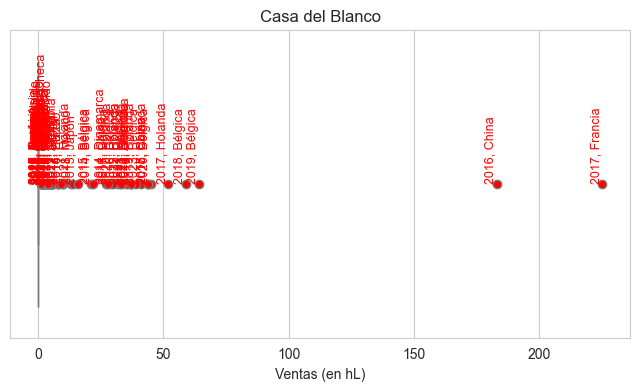

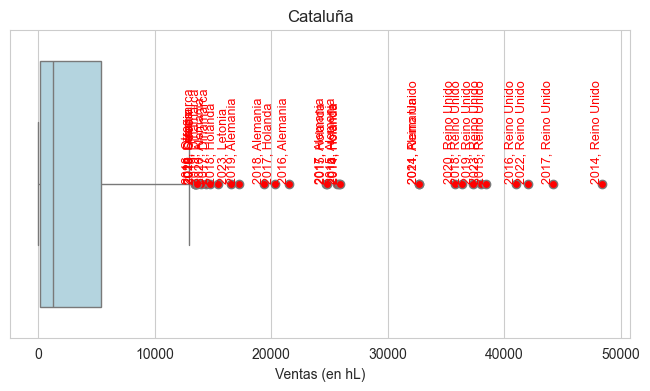

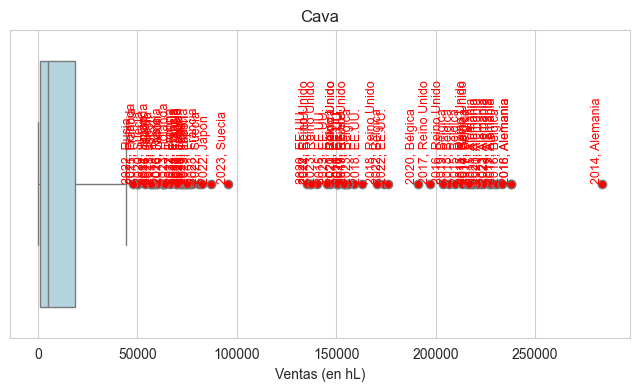

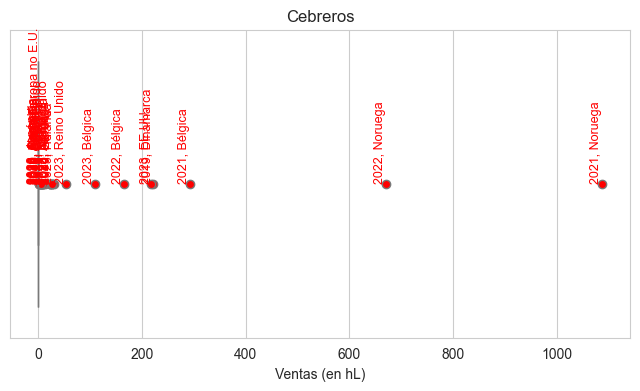

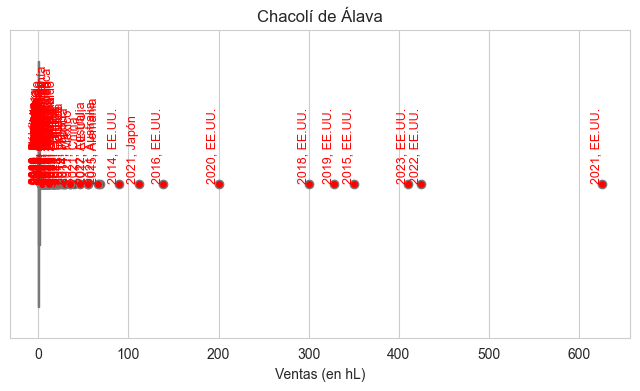

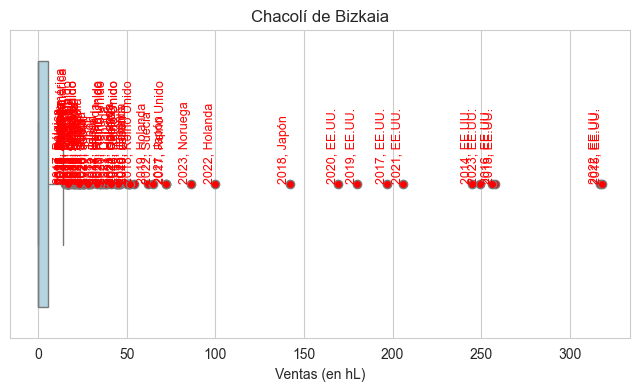

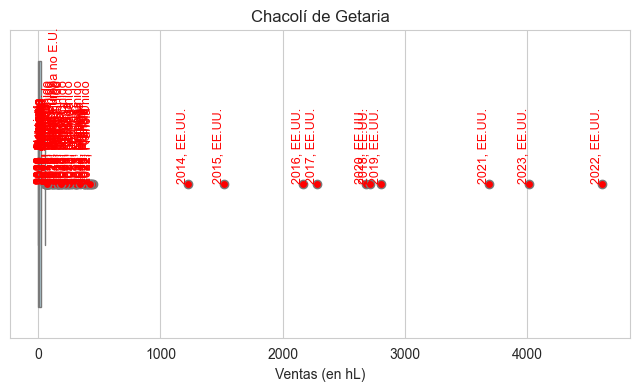

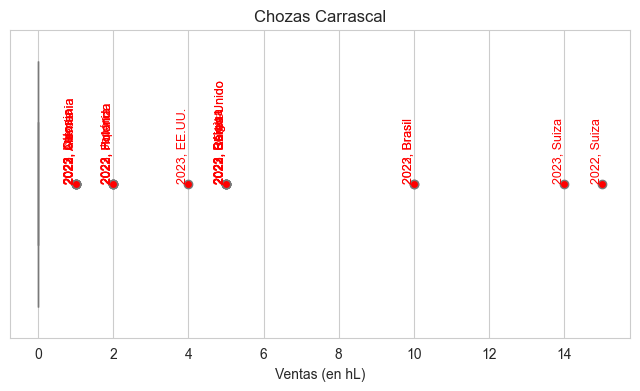

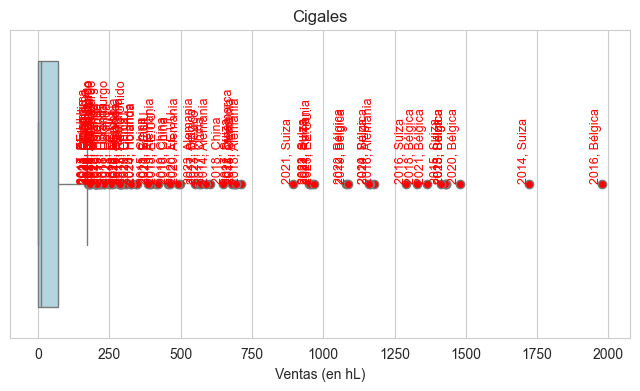

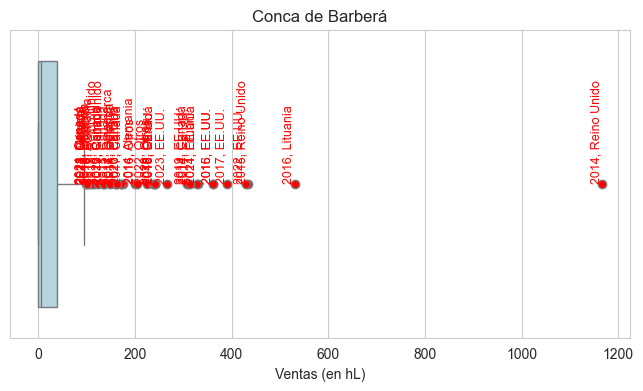

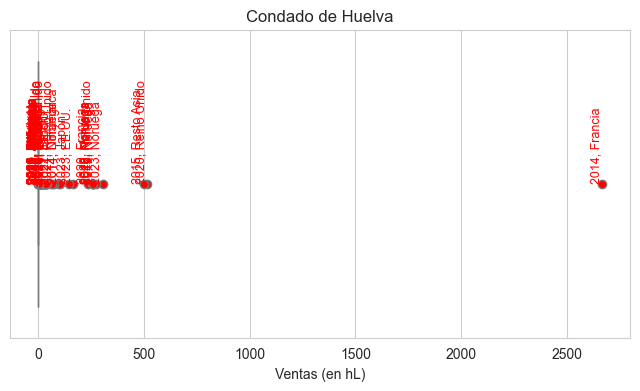

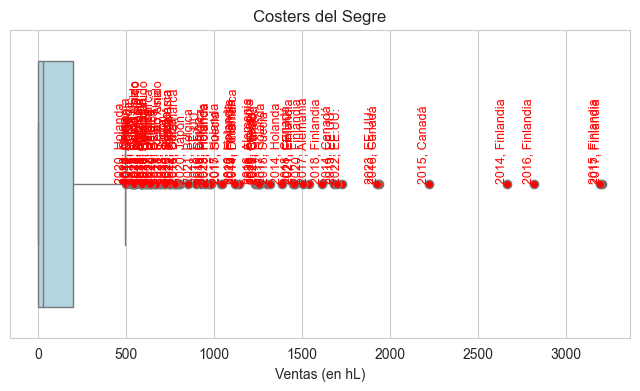

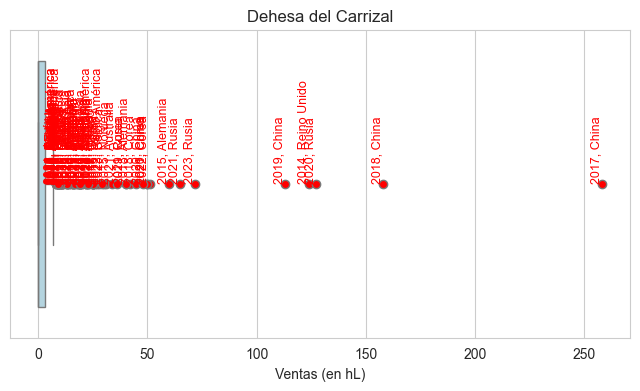

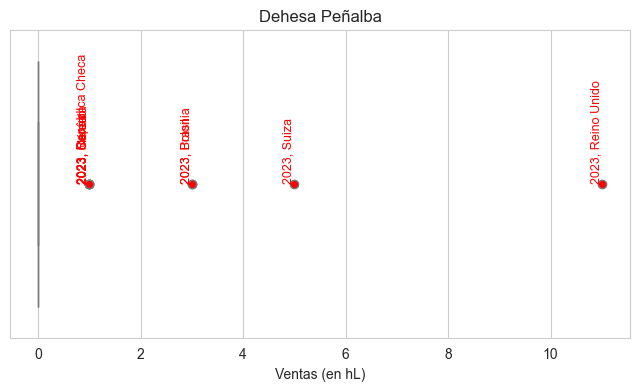

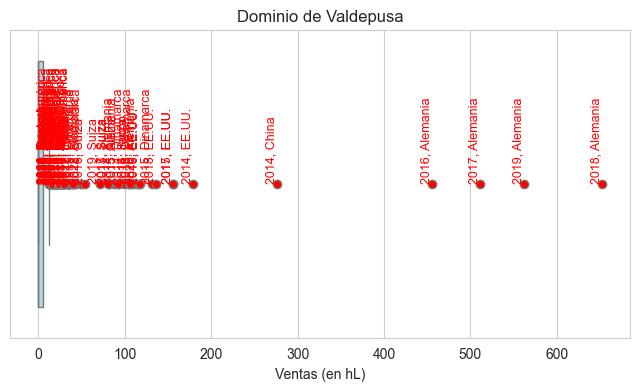

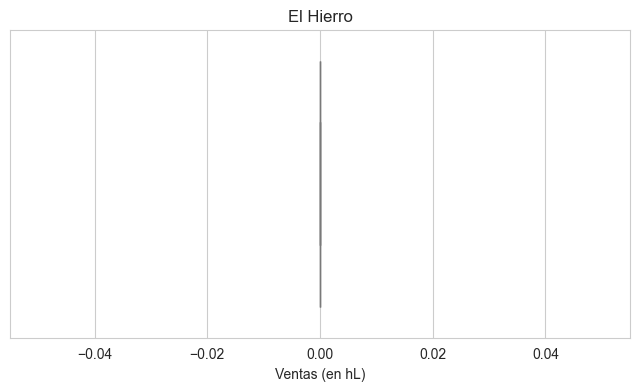

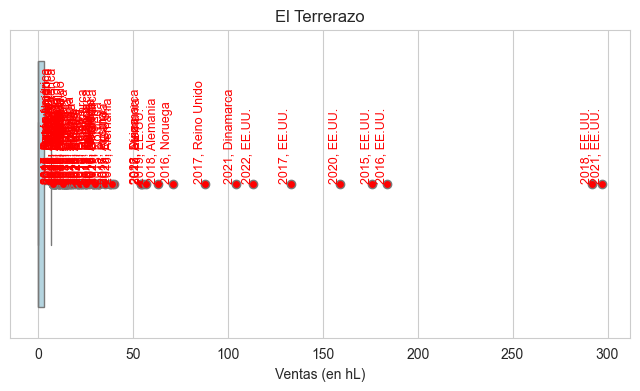

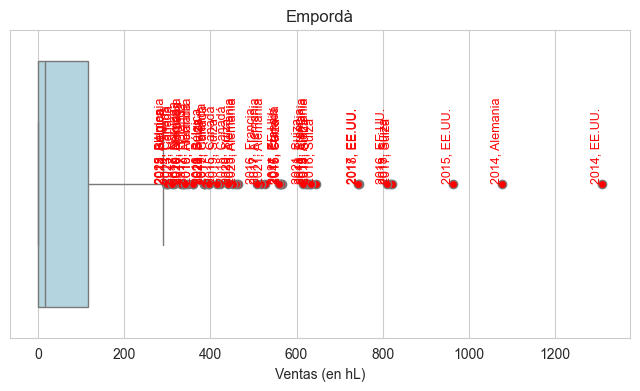

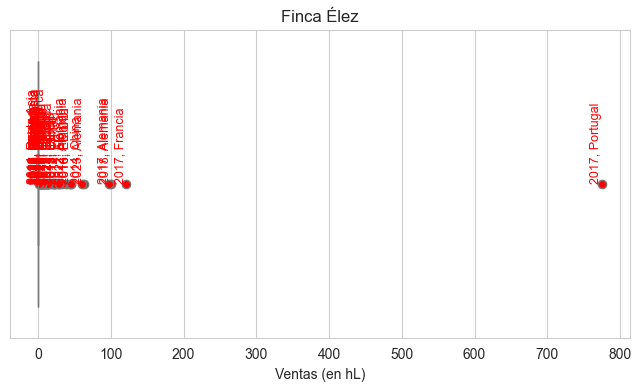

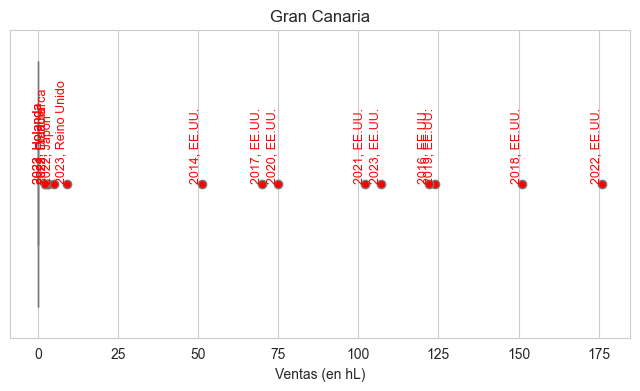

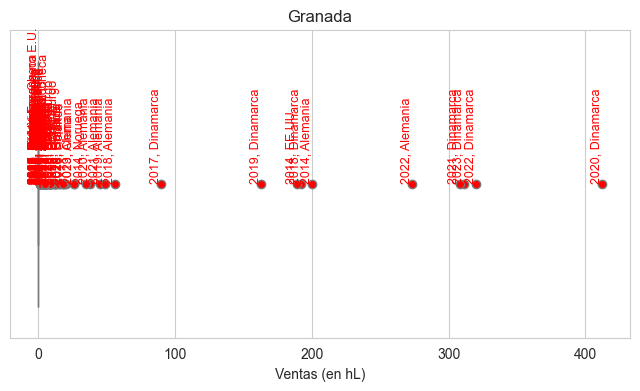

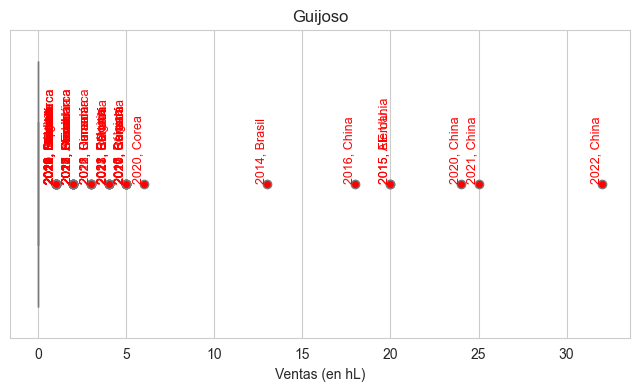

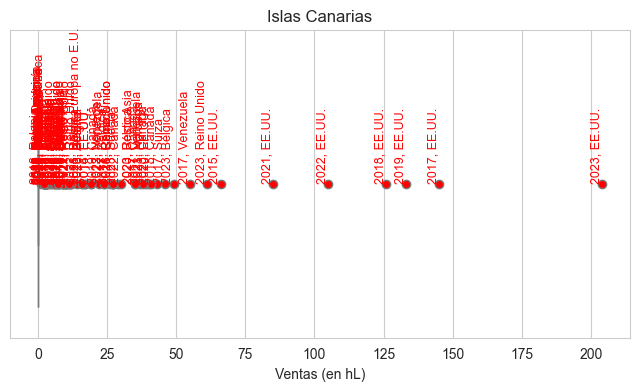

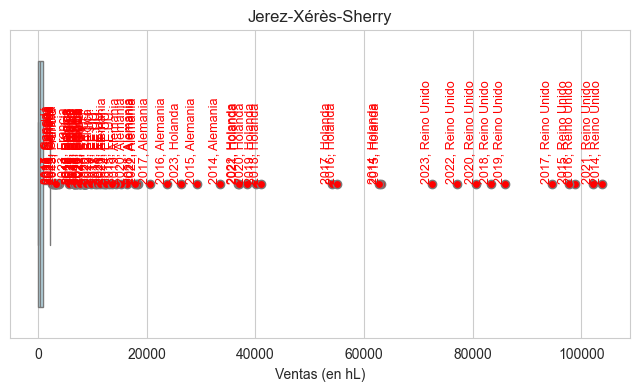

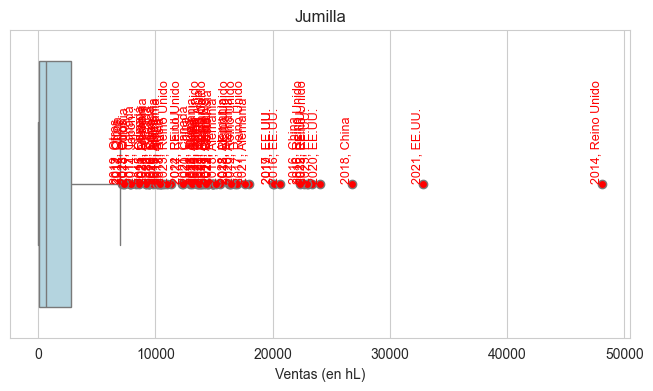

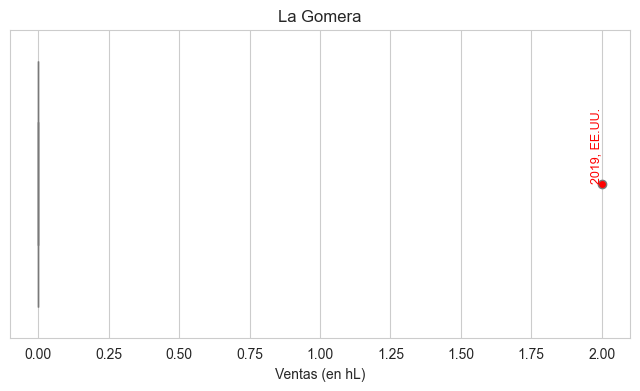

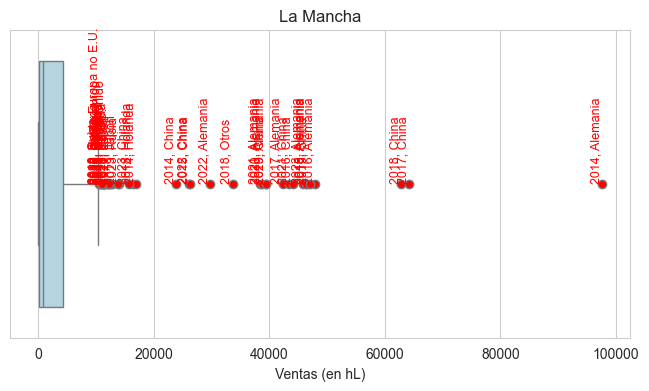

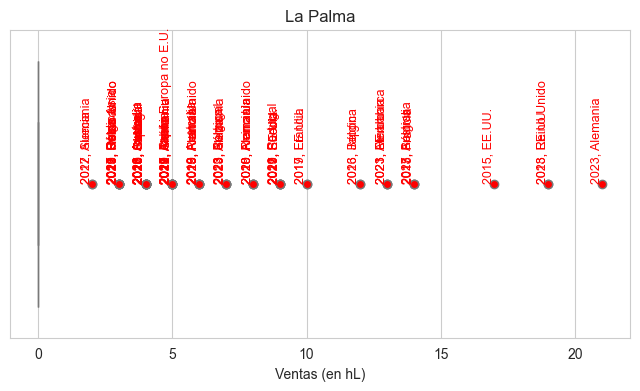

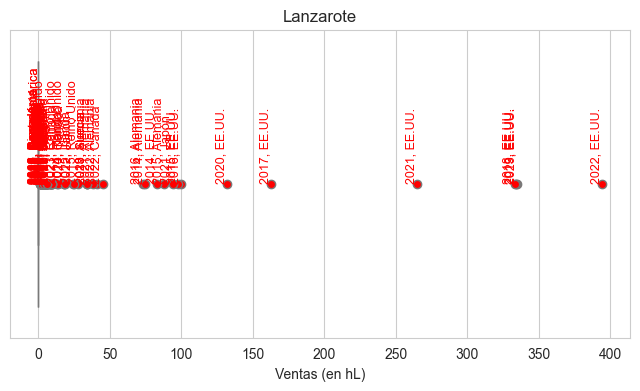

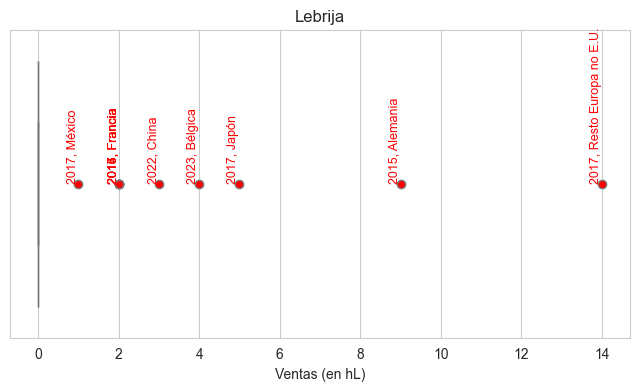

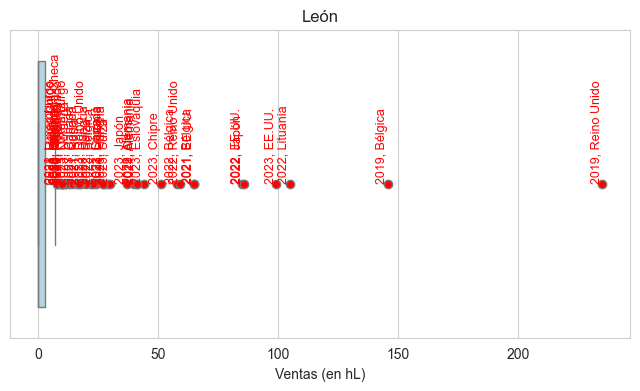

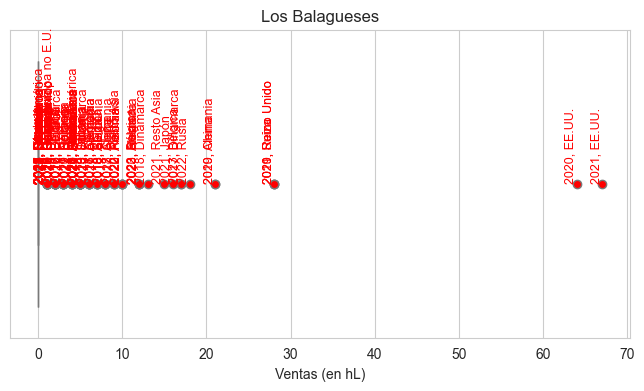

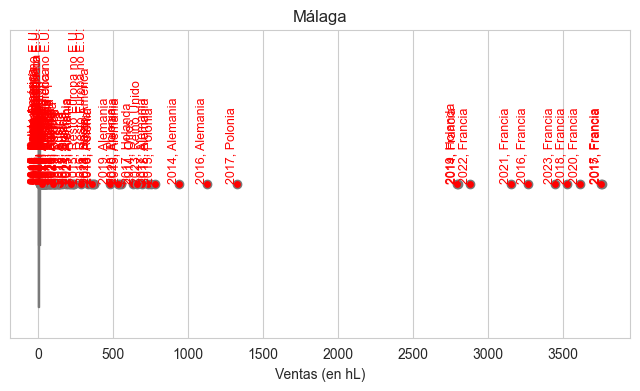

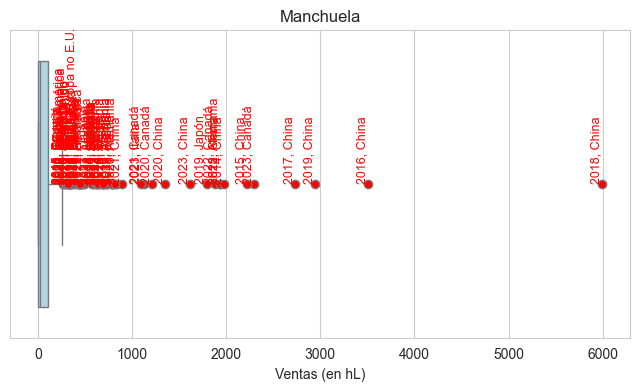

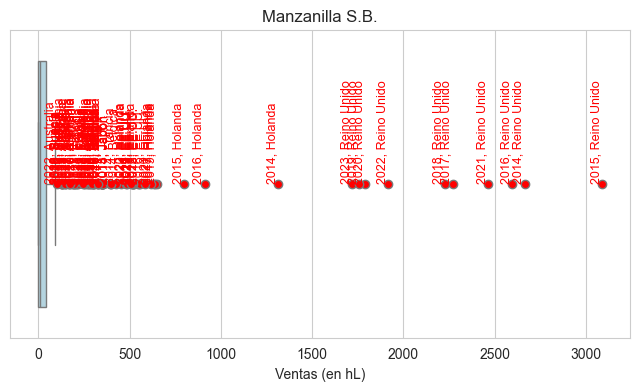

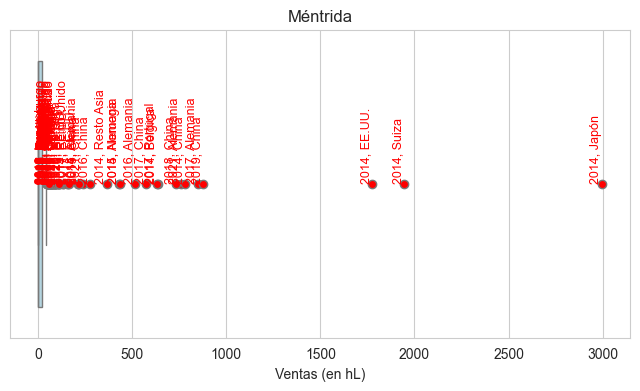

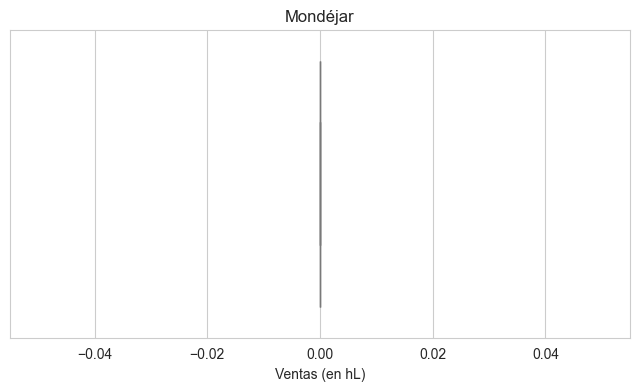

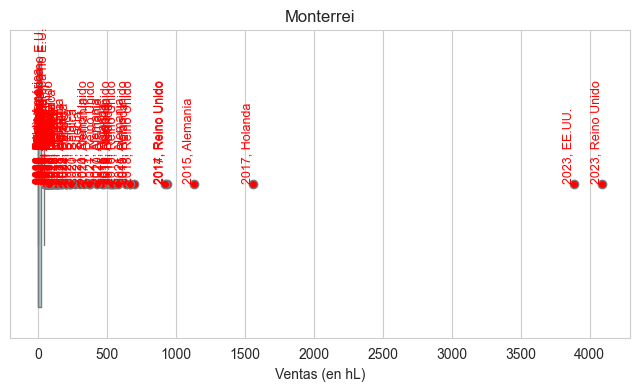

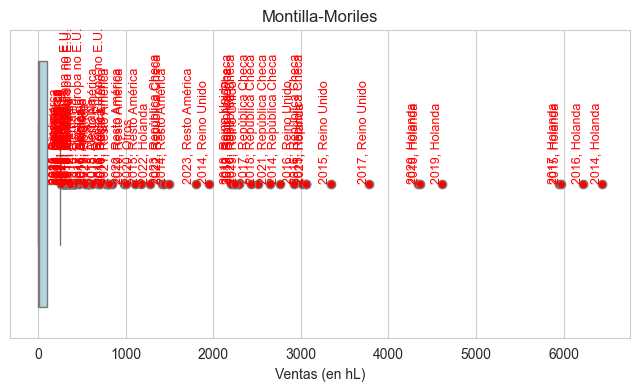

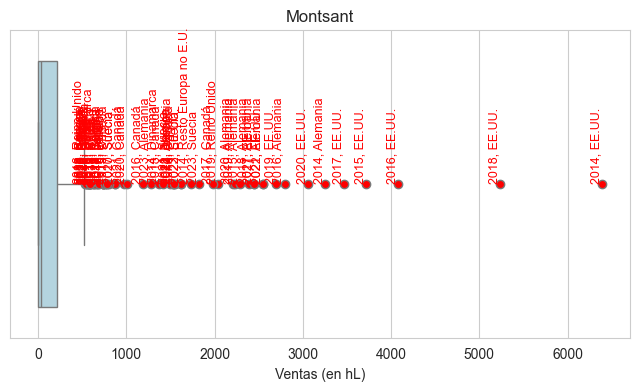

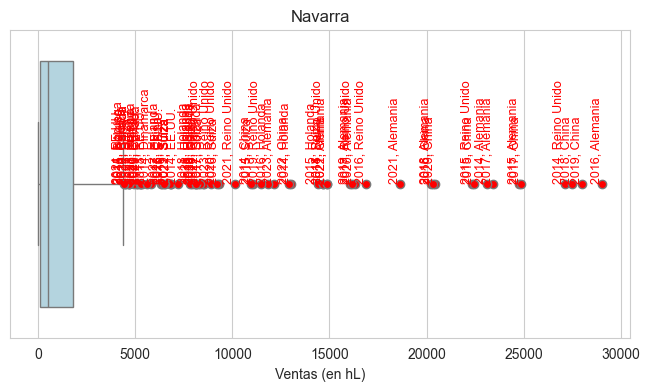

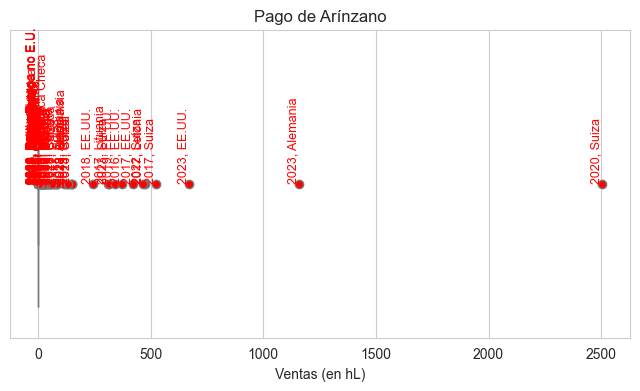

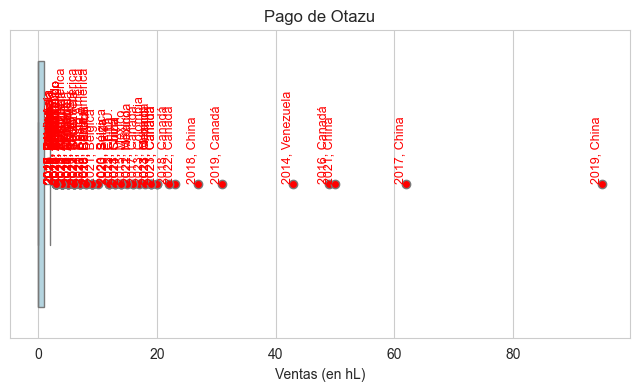

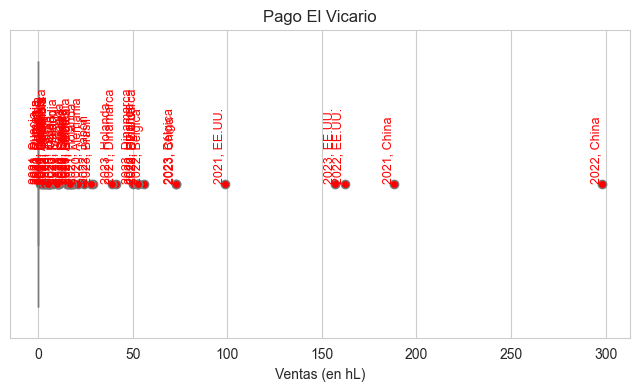

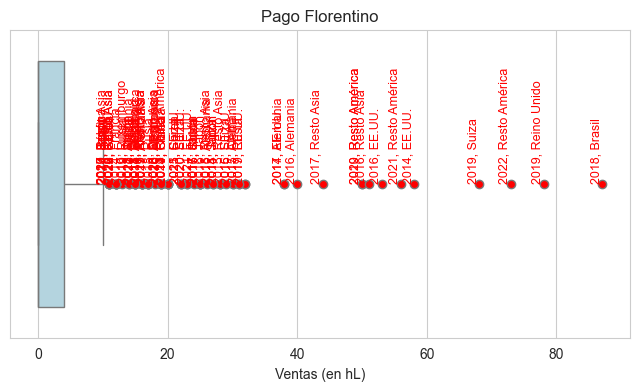

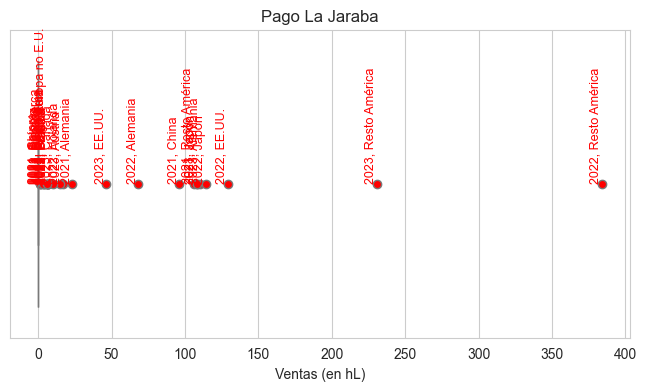

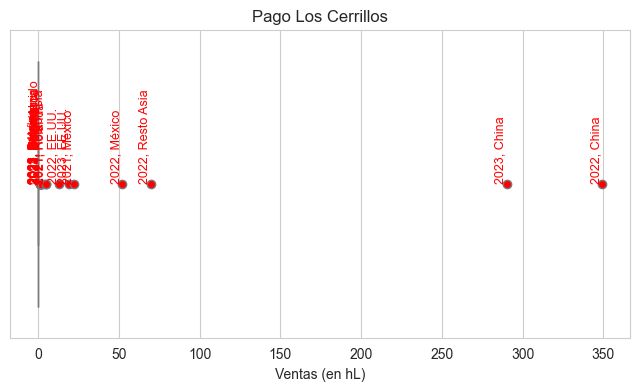

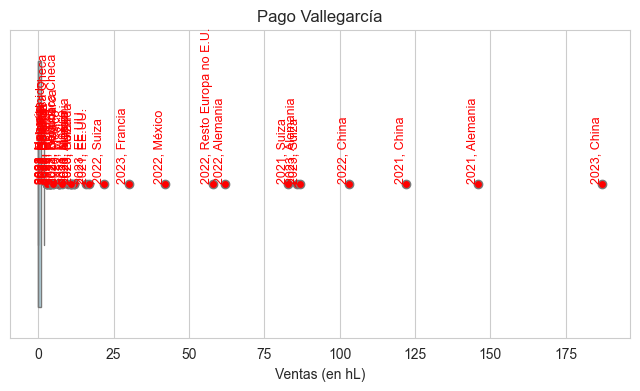

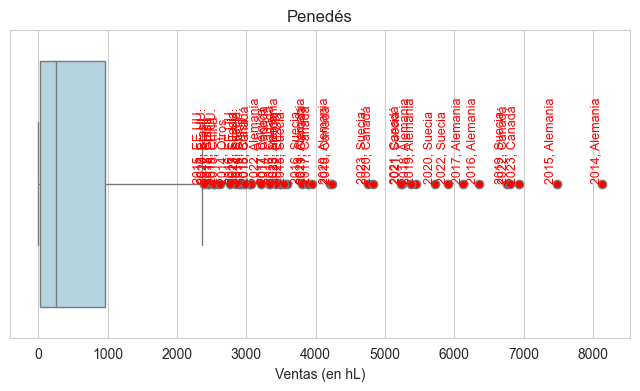

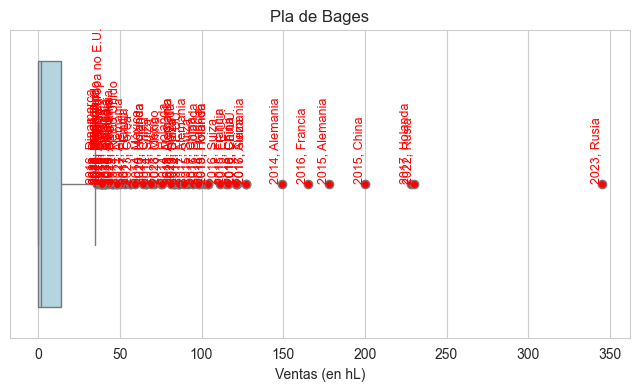

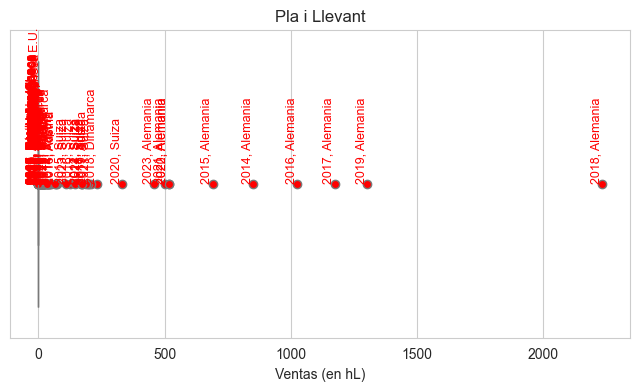

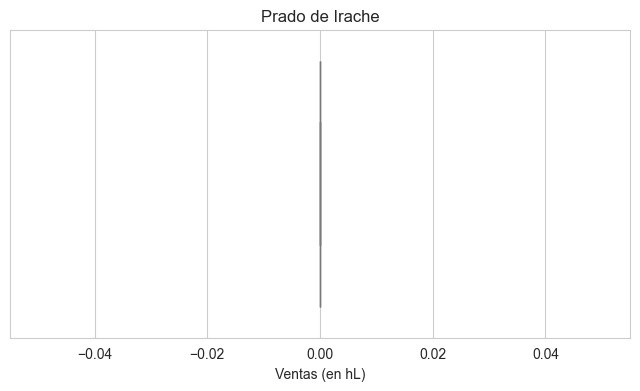

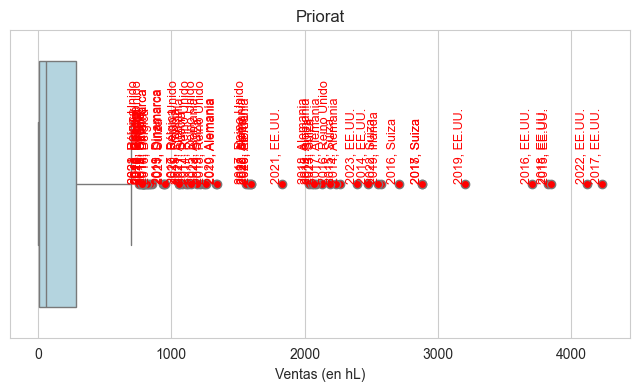

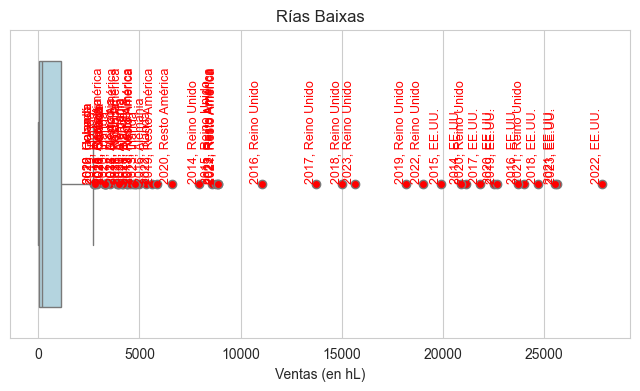

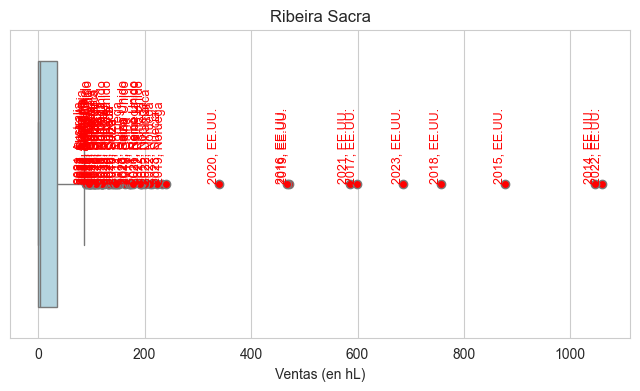

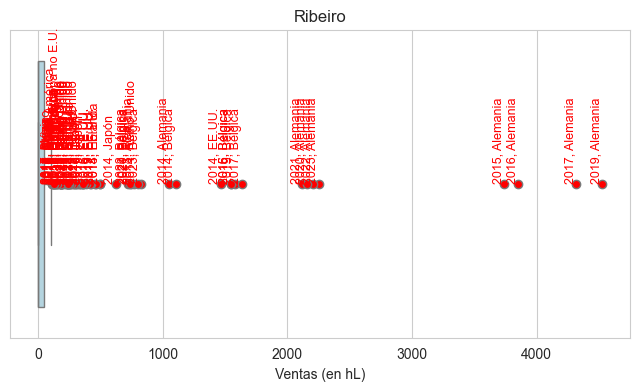

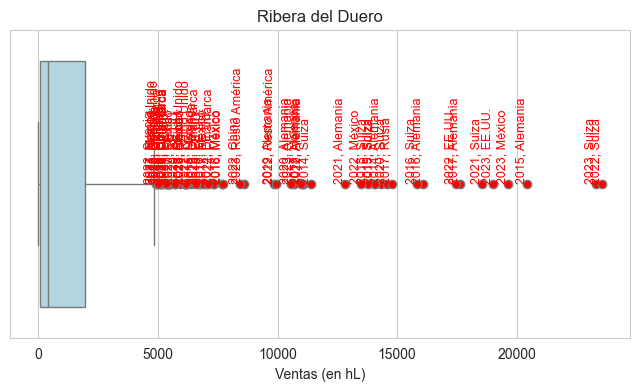

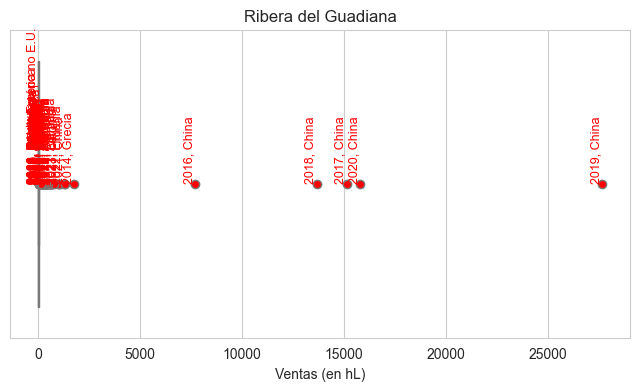

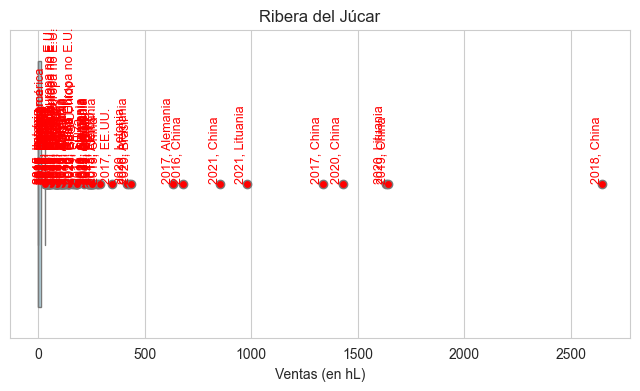

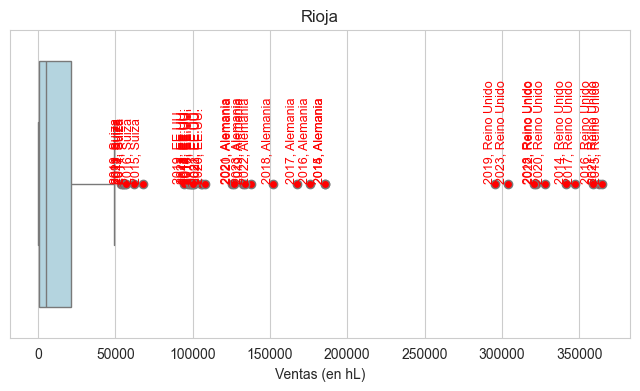

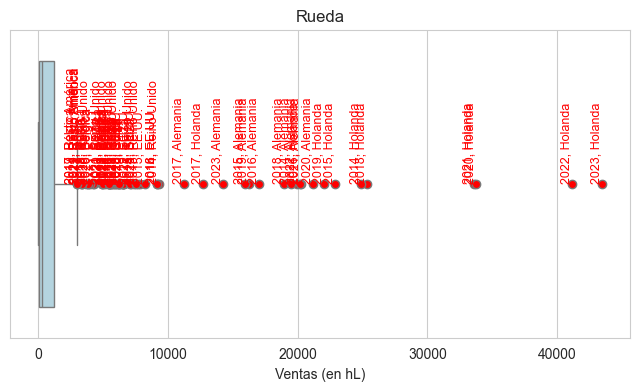

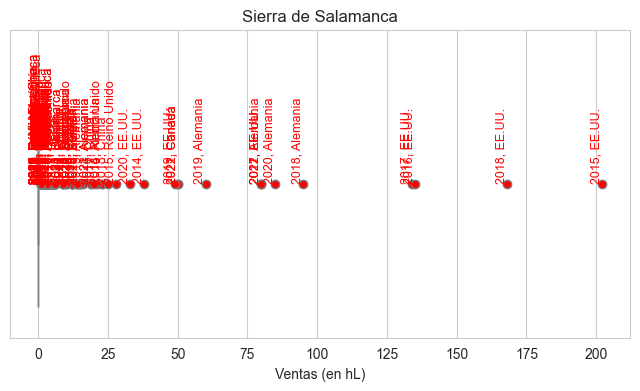

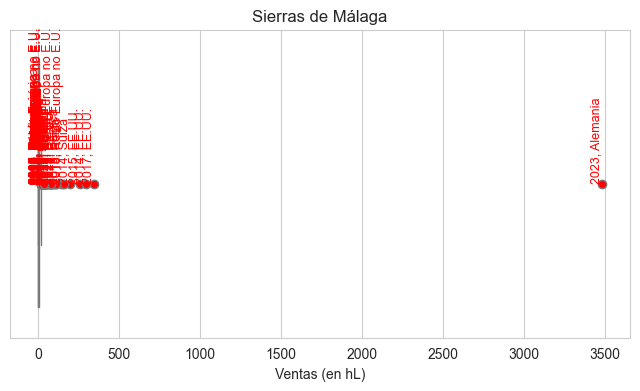

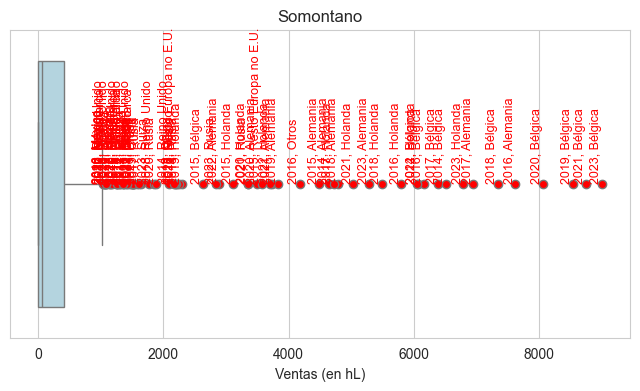

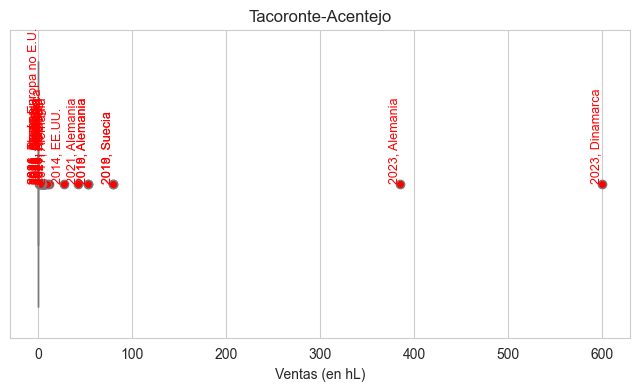

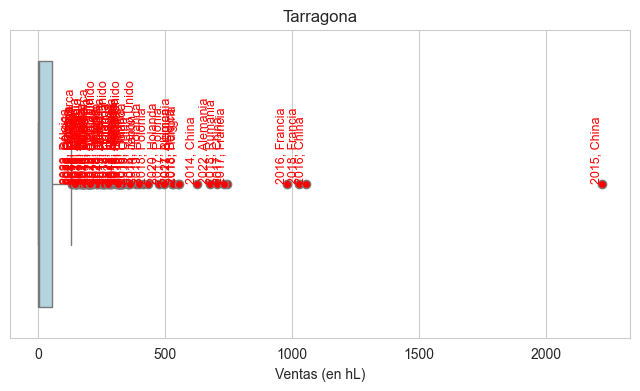

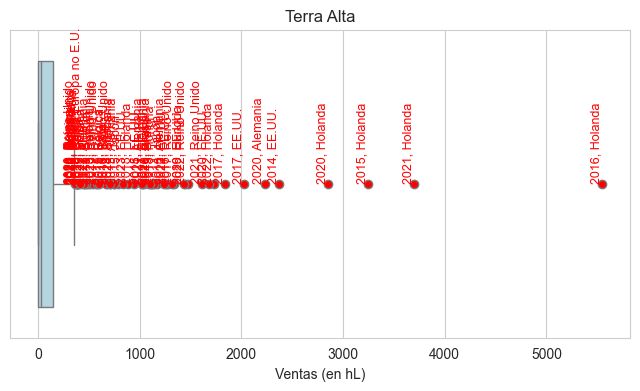

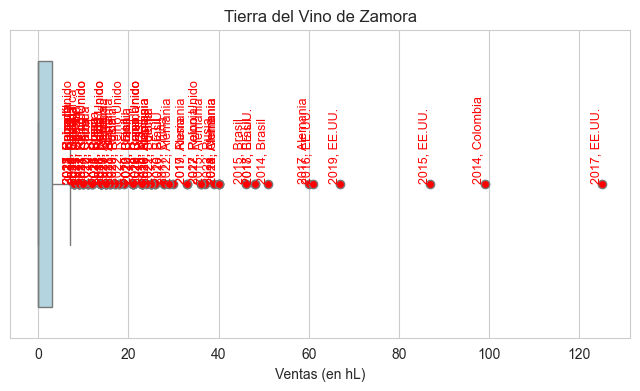

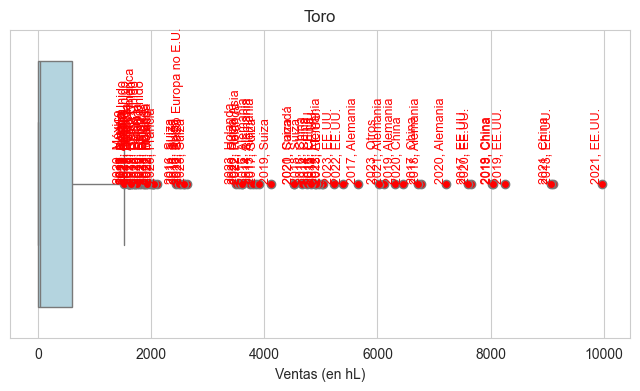

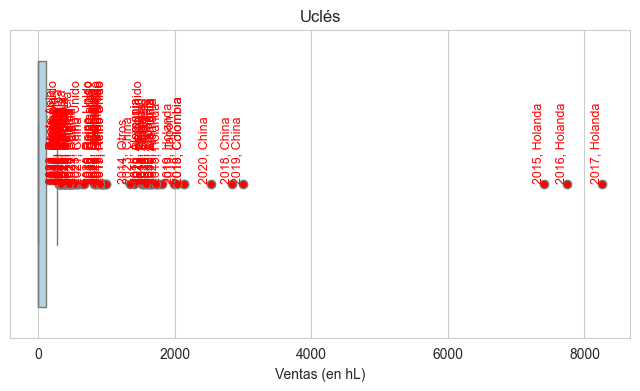

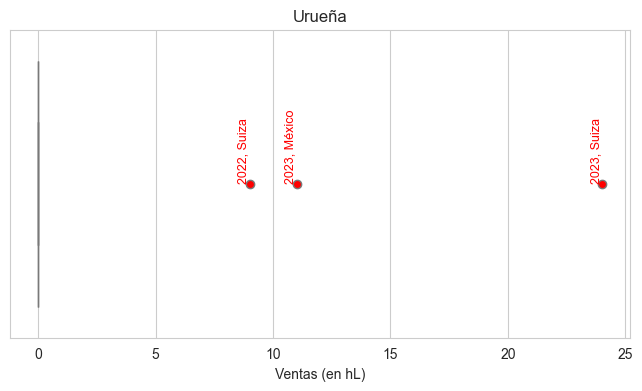

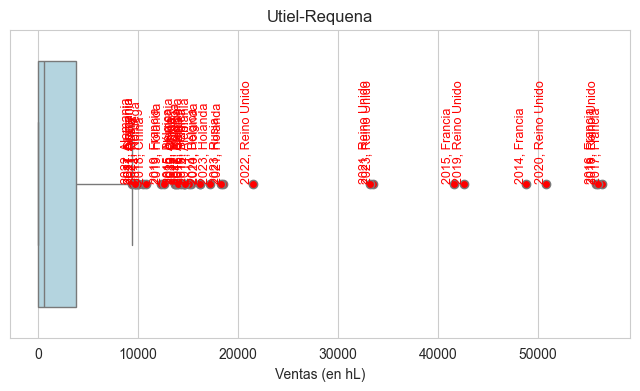

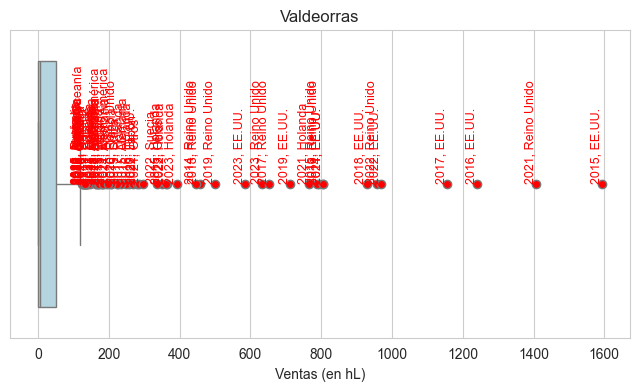

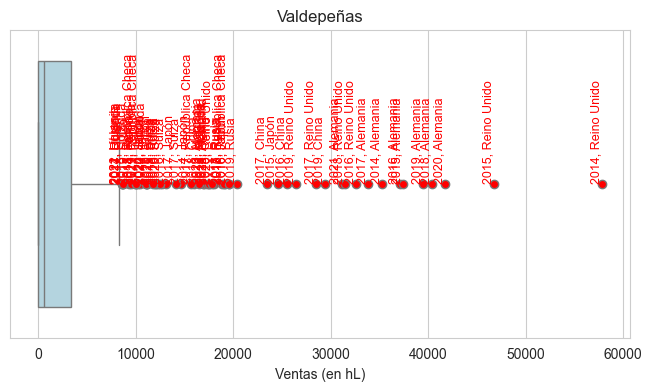

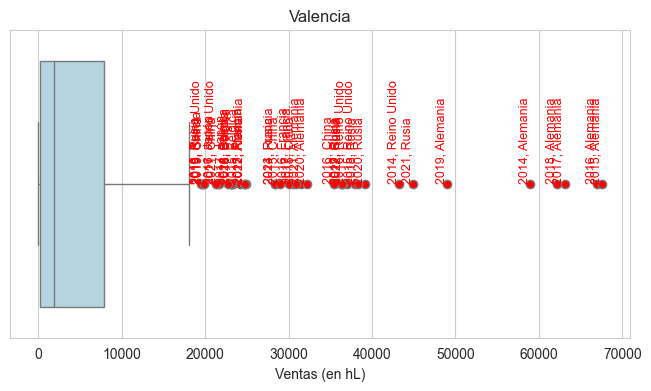

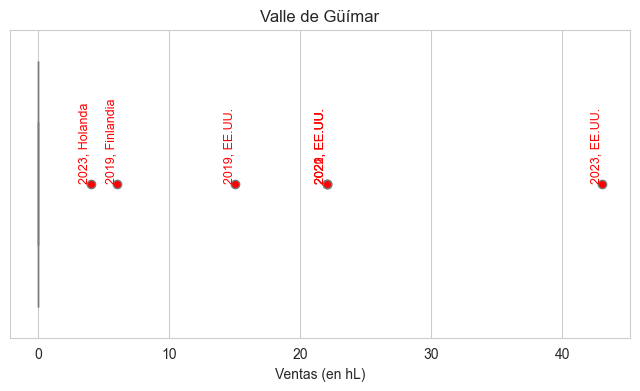

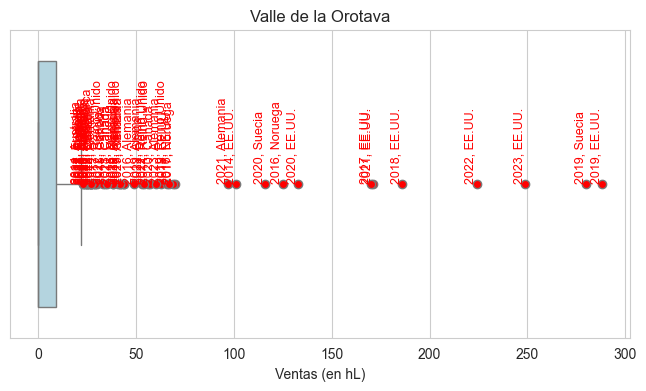

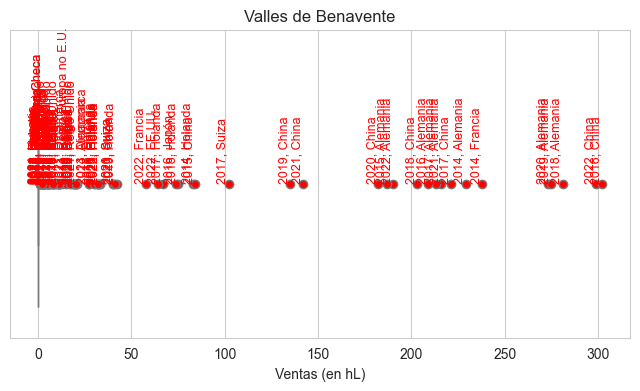

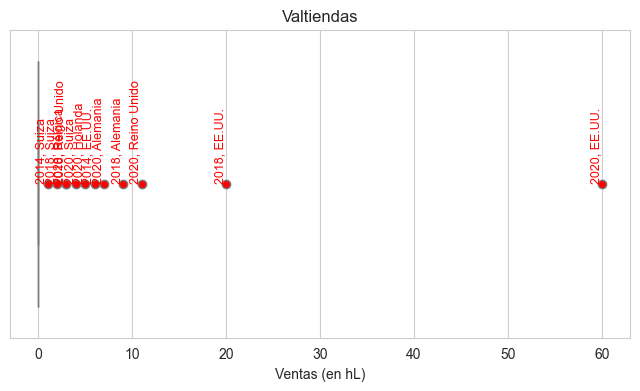

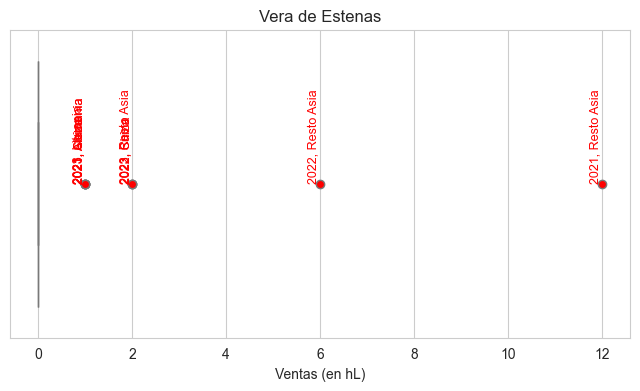

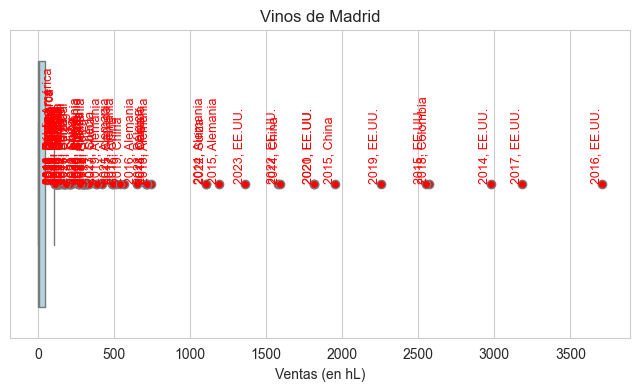

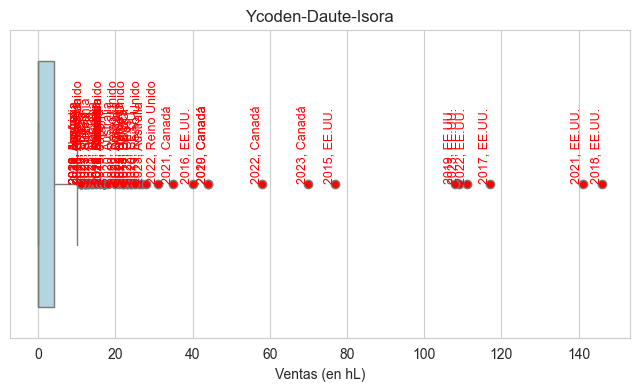

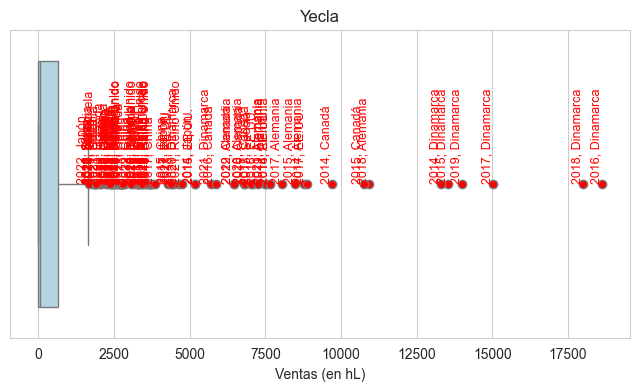

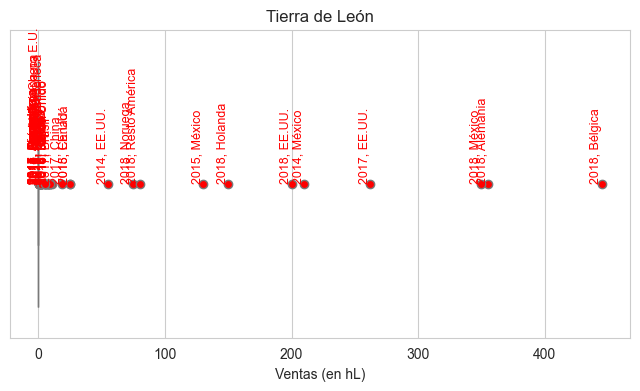

In [39]:
# Boxplots con los outliers señalados
# Obtener todas las DOPs únicas
dops_unicas = df_exportacion_spain['DOPs'].unique()

sns.set_style("whitegrid")

# Función para encontrar outliers y graficarlos
def graficar_boxplot_con_outliers(dop, df_exportacion_spain):
    subset = df_exportacion_spain[df_exportacion_spain['DOPs'] == dop]

    # Calcular IQR
    Q1 = subset["Ventas"].quantile(0.25)
    Q3 = subset["Ventas"].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtrar outliers
    outliers = subset[(subset["Ventas"] < limite_inferior) | (subset["Ventas"] > limite_superior)]

    # Crear el boxplot
    plt.figure(figsize=(8, 4))
    ax = sns.boxplot(x=subset["Ventas"], color="lightblue", flierprops={'markerfacecolor': 'red', 'marker': 'o'})

    # Agregar etiquetas a los outliers
    for _, row in outliers.iterrows():
        plt.text(row["Ventas"], 0, f"{row['Año']}, {row['País']}", 
                 ha='right', va='bottom', fontsize=9, color='red', rotation=90)

    plt.title(f"{dop}")
    plt.xlabel("Ventas (en hL)")
    plt.show()

# Graficar boxplots para cada DOP
for dop in dops_unicas:
    graficar_boxplot_con_outliers(dop, df_exportacion_spain)


C:\Users\usuari\AppData\Local\Temp\ipykernel_15708\704564718.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_exportacion_spain, x="Año", y="Ventas", palette="coolwarm")


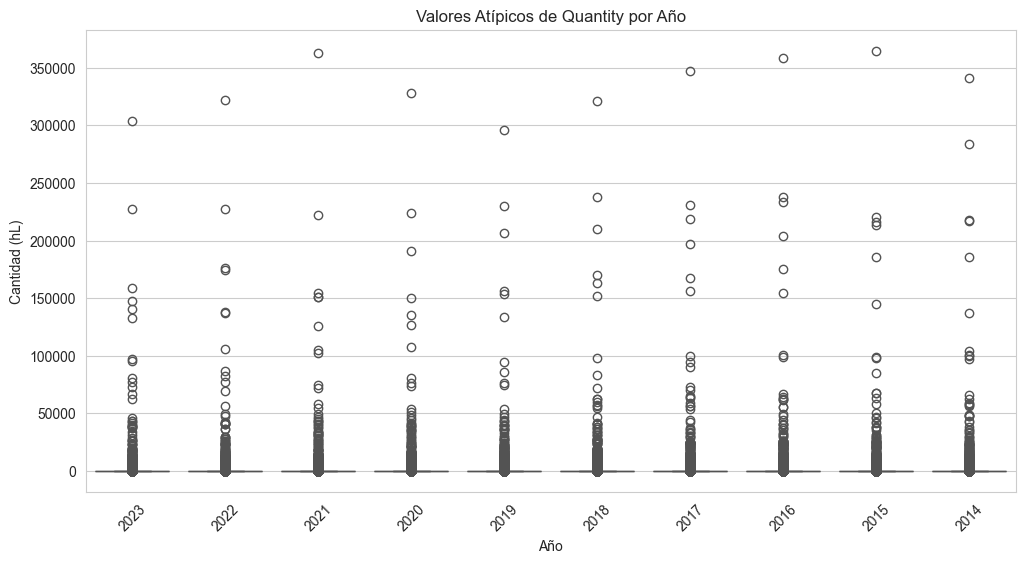

In [40]:
# Valores atípicos por año
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_exportacion_spain, x="Año", y="Ventas", palette="coolwarm")
plt.title("Valores Atípicos de Quantity por Año")
plt.xlabel("Año")
plt.ylabel("Cantidad (hL)")
plt.xticks(rotation=45)  
plt.show()

### Visualización en tablas de los 10 países que más exportan por año

In [41]:
# Tabla con países que más exportan por año
# Países a los que más se exporta por año   
top_10_paises_por_año = df_exportacion_spain.groupby(["Año", "País"])["Ventas"].sum().reset_index()

# Ordenamos por Año y Ventas, de mayor a menor
top_10_paises_por_año = top_10_paises_por_año.sort_values(by=["Año", "Ventas"], ascending=[True, False])

# Seleccionamos los 10 países con más ventas por cada año
top_10_paises_por_año = top_10_paises_por_año.groupby("Año").head(10)

print(top_10_paises_por_año)

      Año         País   Ventas
36   2014  Reino Unido  1063354
0    2014     Alemania   941332
14   2014       EE.UU.   461550
6    2014      Bélgica   355174
21   2014      Holanda   289454
..    ...          ...      ...
466  2023        Rusia   198056
467  2023       Suecia   164810
430  2023       Canadá   153852
442  2023      Francia   132214
468  2023        Suiza   131805

[100 rows x 3 columns]


### Visualización en gráficos de barra de los 10 países a los que más exporta por año

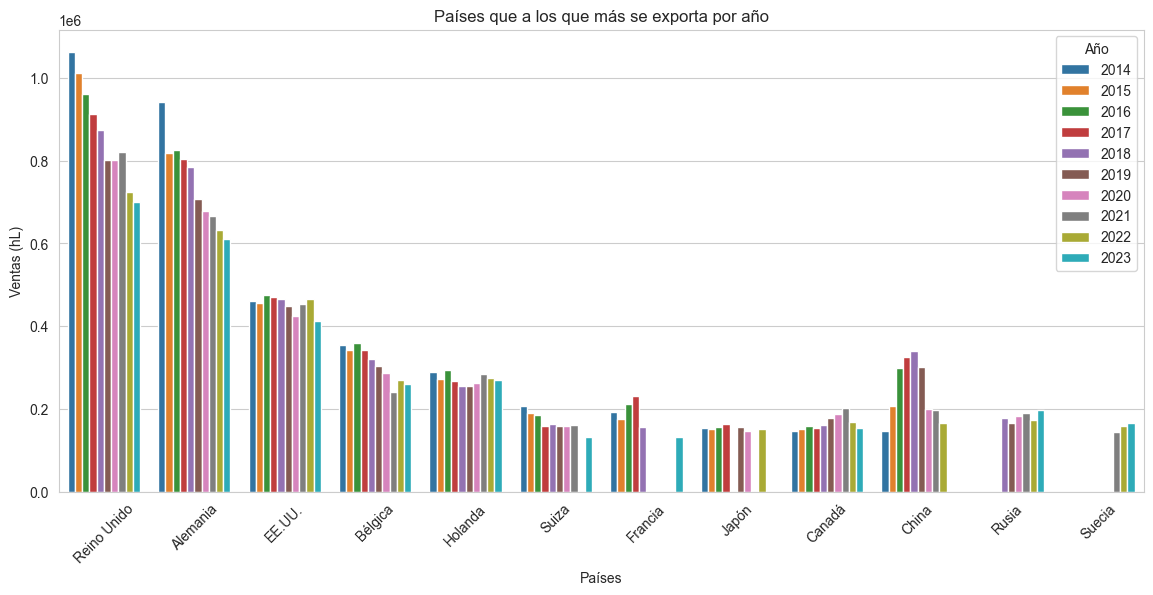

In [42]:
# Gráfico de los países a los que más se exporta por año en conjunto
# Configuración del gráfico
plt.figure(figsize=(14,6))
sns.barplot(data=top_10_paises_por_año, x="País", y="Ventas", hue="Año", dodge=True)

plt.title("Países que a los que más se exporta por año")
plt.xlabel("Países")
plt.ylabel("Ventas (hL)")
plt.xticks(rotation=45)
plt.legend(title="Año")
plt.show()

##### Se observa una clara dependencia de Reino Unido y Alemania para el vino español. Está bien asentado en Europa y con presencia en América del Norte como se ve en los casos de Estados Unidos y Canadá. Recomendable afianzar la relación de exportación con Japón y Francia ya que hay variaciones en la comercialización muy agudas. En cuanto al mercado de Rusia y Suecia se mantiene a nivel constante, Suecia tiene un crecimiento del consumo de vino español que va creciendo paulatinamente

C:\Users\usuari\AppData\Local\Temp\ipykernel_15708\10697787.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_año, x="País", y="Ventas", palette="Blues_d")


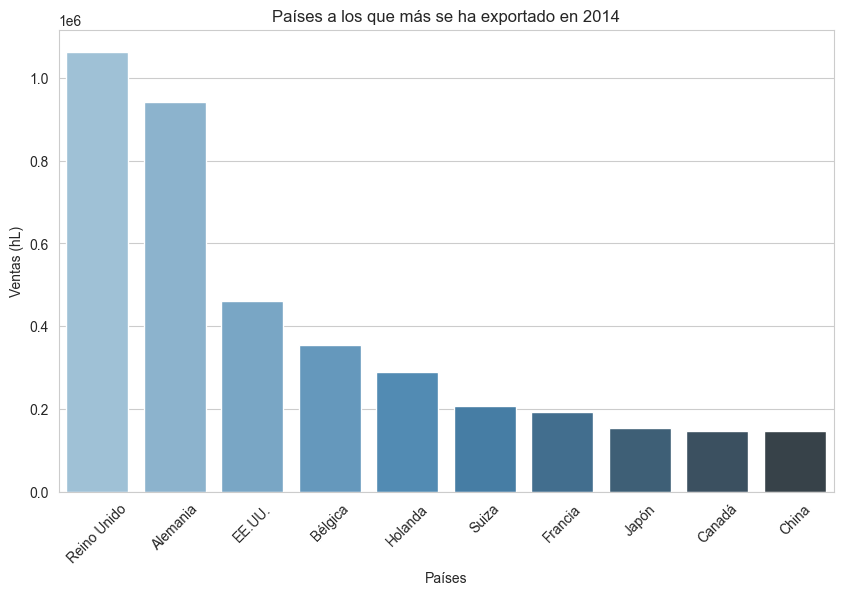

C:\Users\usuari\AppData\Local\Temp\ipykernel_15708\10697787.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_año, x="País", y="Ventas", palette="Blues_d")


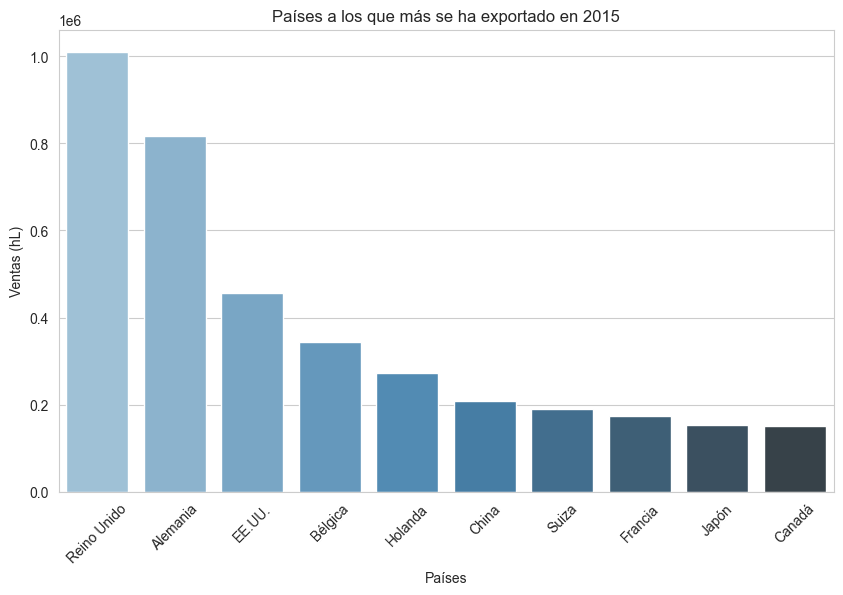

C:\Users\usuari\AppData\Local\Temp\ipykernel_15708\10697787.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_año, x="País", y="Ventas", palette="Blues_d")


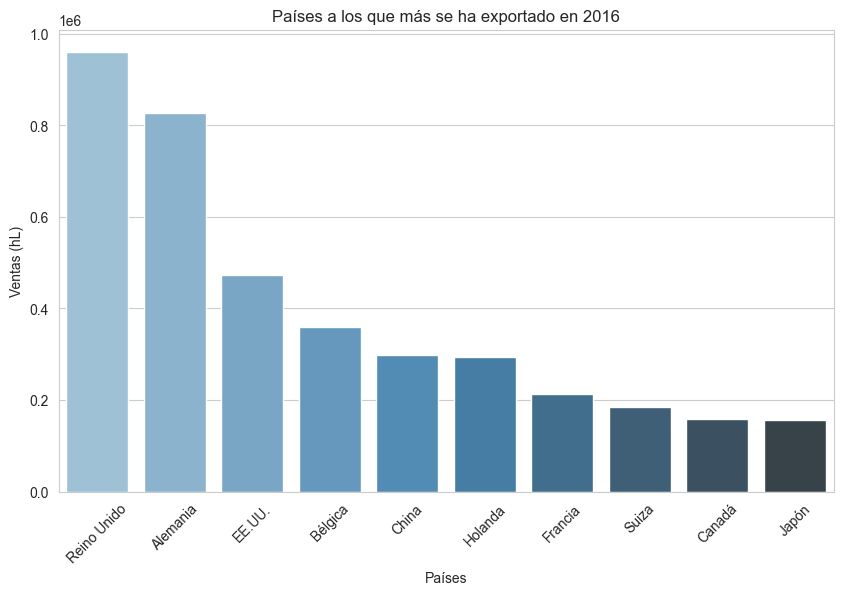

C:\Users\usuari\AppData\Local\Temp\ipykernel_15708\10697787.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_año, x="País", y="Ventas", palette="Blues_d")


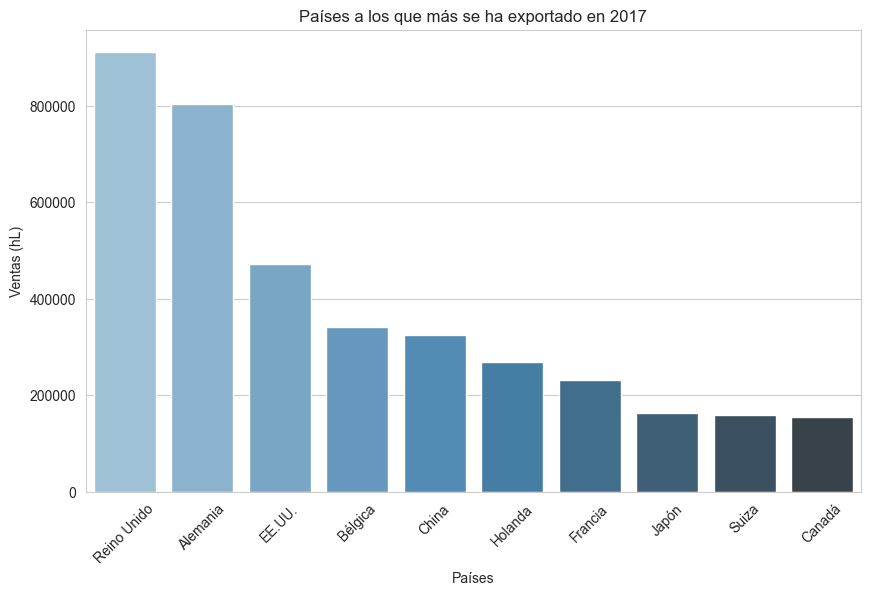

C:\Users\usuari\AppData\Local\Temp\ipykernel_15708\10697787.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_año, x="País", y="Ventas", palette="Blues_d")


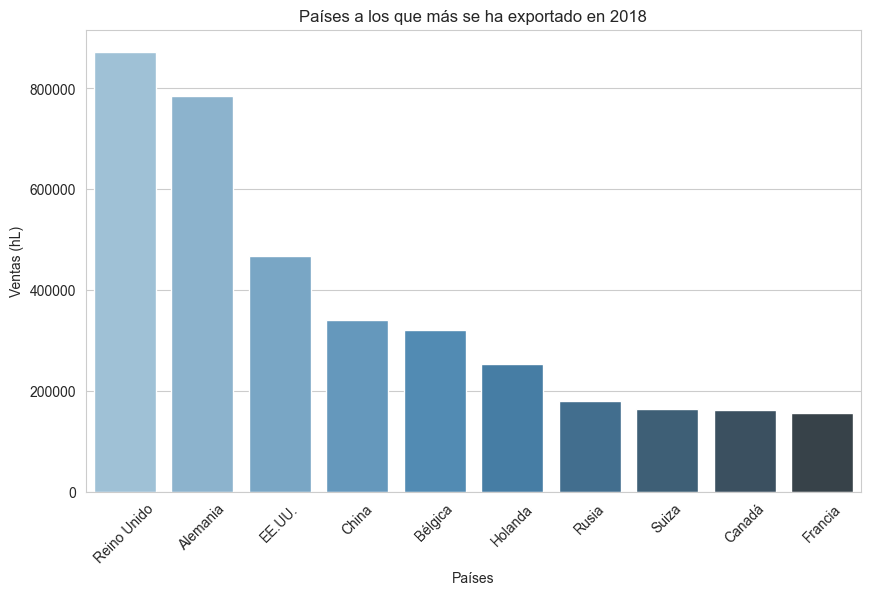

C:\Users\usuari\AppData\Local\Temp\ipykernel_15708\10697787.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_año, x="País", y="Ventas", palette="Blues_d")


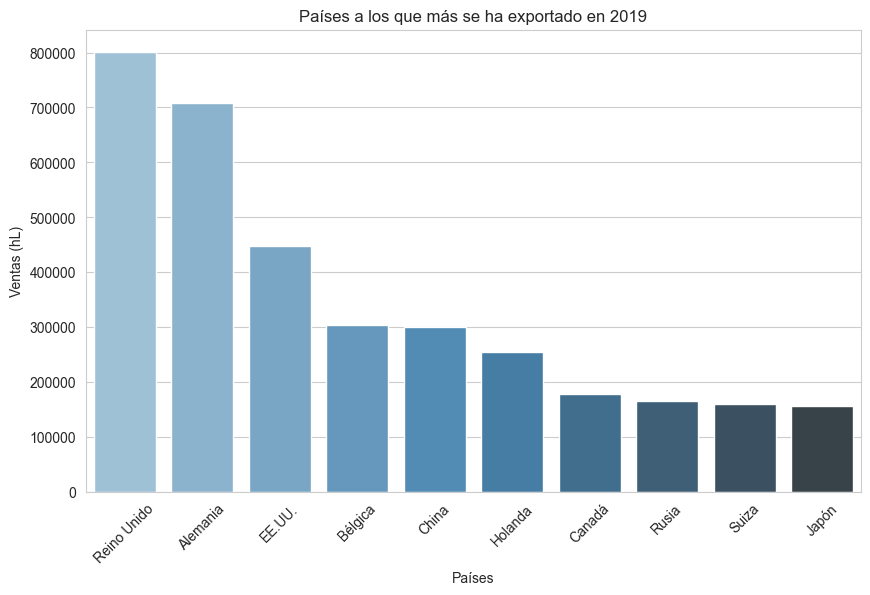

C:\Users\usuari\AppData\Local\Temp\ipykernel_15708\10697787.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_año, x="País", y="Ventas", palette="Blues_d")


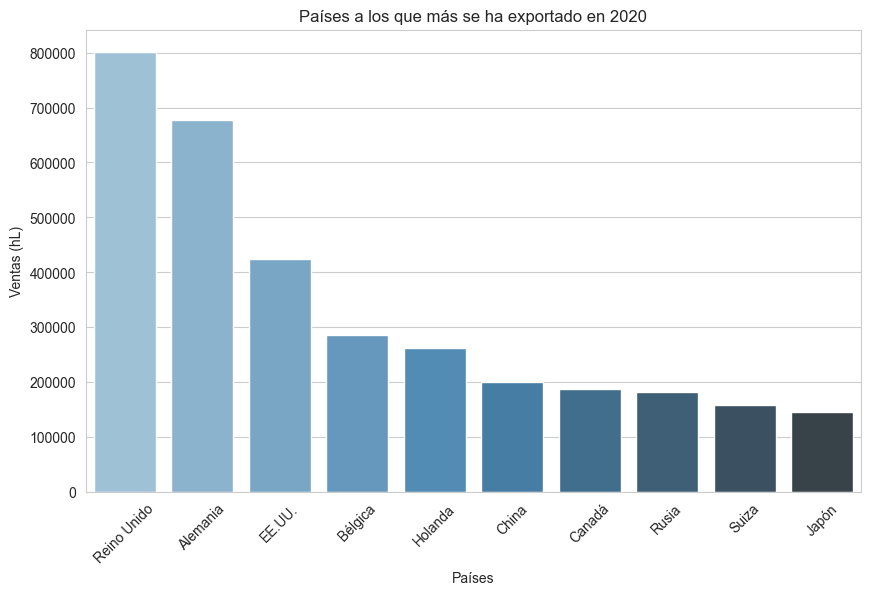

C:\Users\usuari\AppData\Local\Temp\ipykernel_15708\10697787.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_año, x="País", y="Ventas", palette="Blues_d")


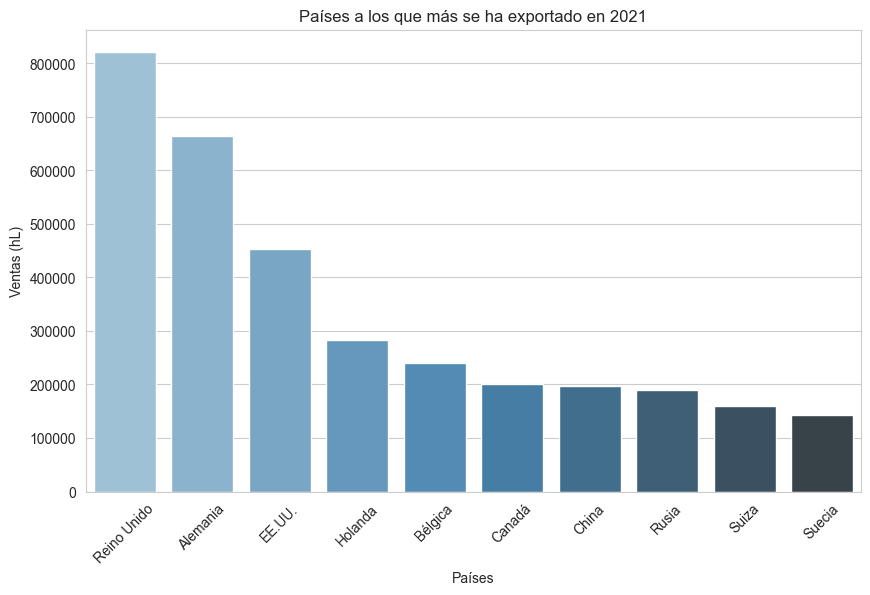

C:\Users\usuari\AppData\Local\Temp\ipykernel_15708\10697787.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_año, x="País", y="Ventas", palette="Blues_d")


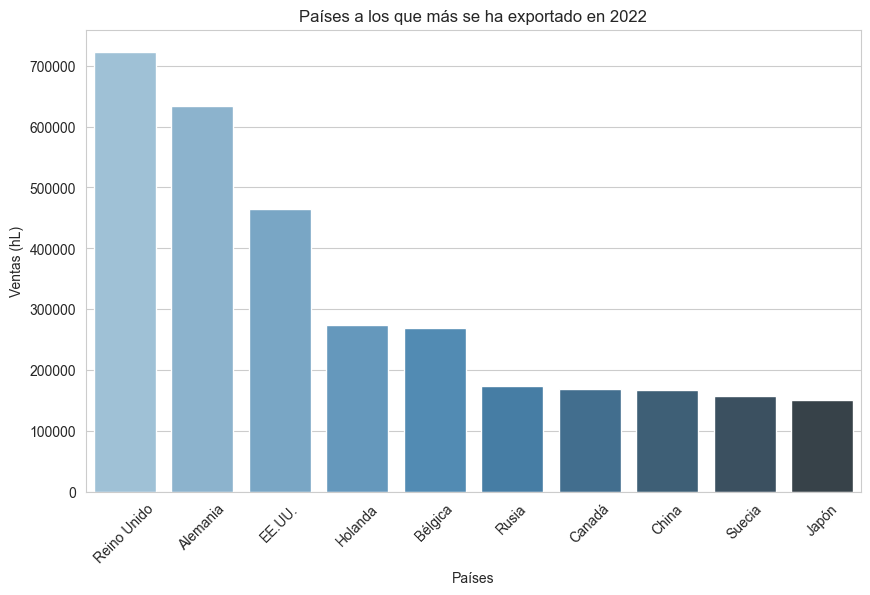

C:\Users\usuari\AppData\Local\Temp\ipykernel_15708\10697787.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_año, x="País", y="Ventas", palette="Blues_d")


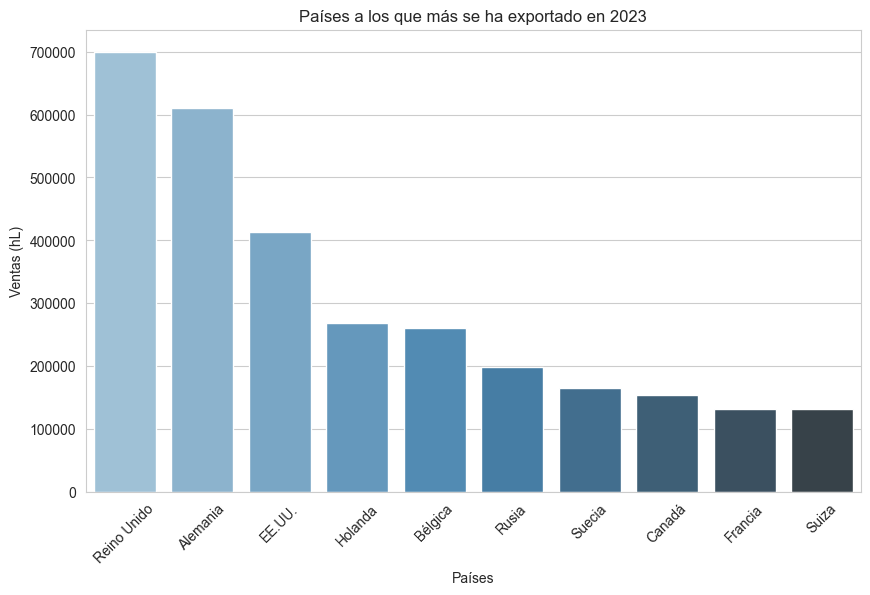

In [43]:
#Gráfico de los países a los que más se exporta por año determinado
#Obtenemos todos los años únicos
años_unicos = top_10_paises_por_año["Año"].unique()

# Creamos un gráfico para cada año
for año in años_unicos:
    # Filtramos los datos para el año específico
    df_año = top_10_paises_por_año[top_10_paises_por_año["Año"] == año]
    
    # Creamos el gráfico
    plt.figure(figsize=(10,6))
    sns.barplot(data=df_año, x="País", y="Ventas", palette="Blues_d")
    
    # Personalizamos el gráfico
    plt.title(f"Países a los que más se ha exportado en {año}")
    plt.xlabel("Países")
    plt.ylabel("Ventas (hL)")
    plt.xticks(rotation=45)
    plt.show()

### Tabla de las 30 DOPs que más se exportan

In [45]:
# Tablas de las 30 DOPs que más exportan por valores acumulados y por porcentaje 
# Agrupar por DOPs y sumar las ventas
ventas_por_dop = df_exportacion_spain.groupby("DOPs")["Ventas"].sum()

# Calcular el total de ventas
total_ventas = ventas_por_dop.sum()

# Calcular el porcentaje de ventas por cada DOP
ventas_por_dop_porcentaje = (ventas_por_dop / total_ventas) * 100

# Crear un DataFrame con las ventas absolutas y el porcentaje
ventas_completas = pd.DataFrame({
    'Ventas Absolutas': ventas_por_dop,
    'Porcentaje': ventas_por_dop_porcentaje
})

# Ordenar el DataFrame por ventas absolutas de mayor a menor
ventas_completas_ordenadas = ventas_completas.sort_values(by="Ventas Absolutas", ascending=False)

# Calcular el porcentaje acumulado
ventas_completas_ordenadas['Porcentaje Acumulado'] = ventas_completas_ordenadas['Porcentaje'].cumsum()

print(ventas_completas_ordenadas.head(30))

                     Ventas Absolutas  Porcentaje  Porcentaje Acumulado
DOPs                                                                   
Cava                         12276347   26.066236             26.066236
Rioja                        10280265   21.827977             47.894213
Valencia                      2883043    6.121534             54.015747
Cariñena                      2232866    4.741020             58.756768
Jerez-Xérès-Sherry            1998394    4.243169             62.999936
La Mancha                     1982003    4.208366             67.208302
Cataluña                      1933299    4.104953             71.313255
Valdepeñas                    1717636    3.647038             74.960293
Utiel-Requena                 1490115    3.163945             78.124239
Jumilla                       1362000    2.891920             81.016159
Navarra                       1082957    2.299431             83.315590
Ribera del Duero               927000    1.968289             85

##### El 54% de las exportaciones españolas se concentran en las DOPs Cava, Rioja y Valencia, siendo Cava y Rioja las DOPs que más se exportan con diferencia, un 26,06% y un 21,82% respectivamente. 

### Gráficas lineales de las 30 DOPs que más se exportan

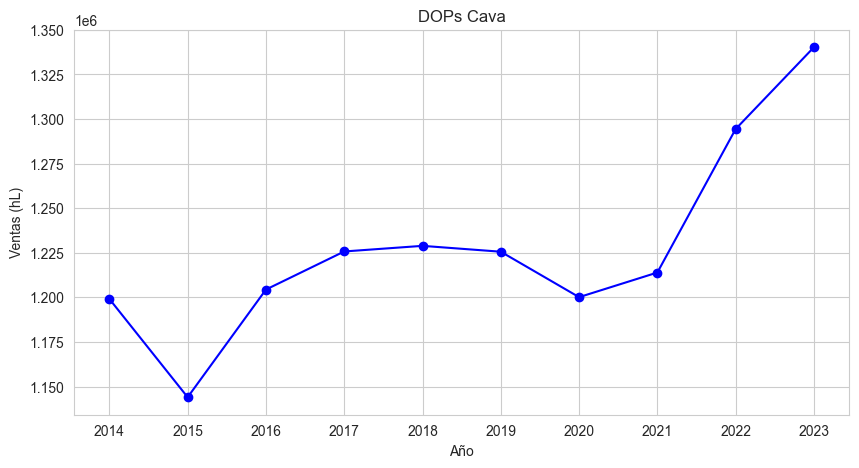

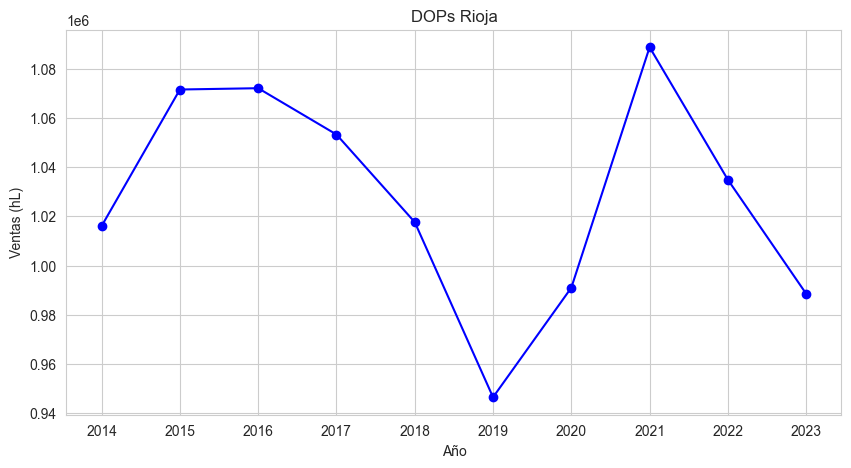

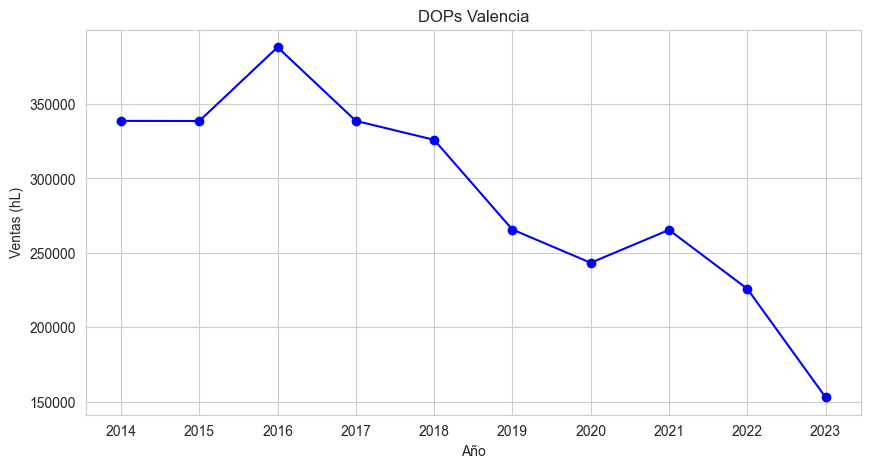

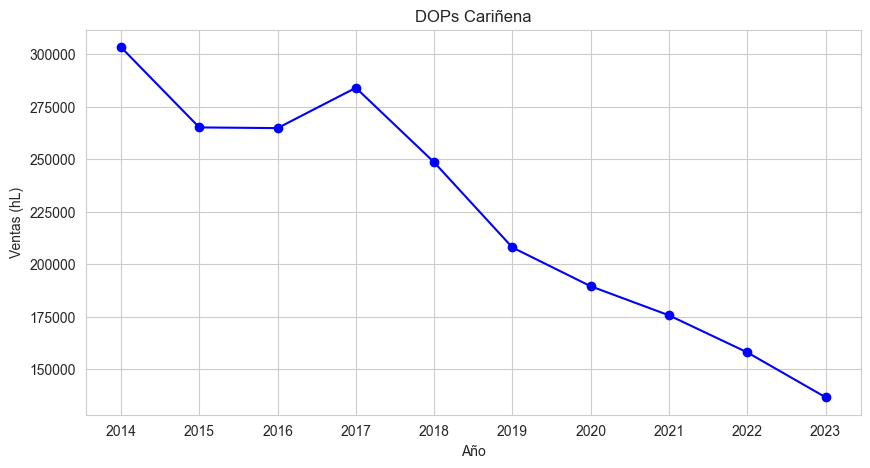

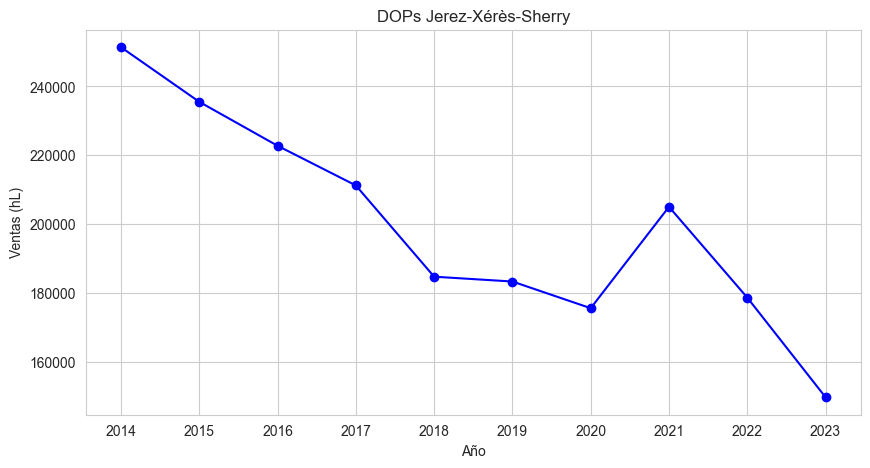

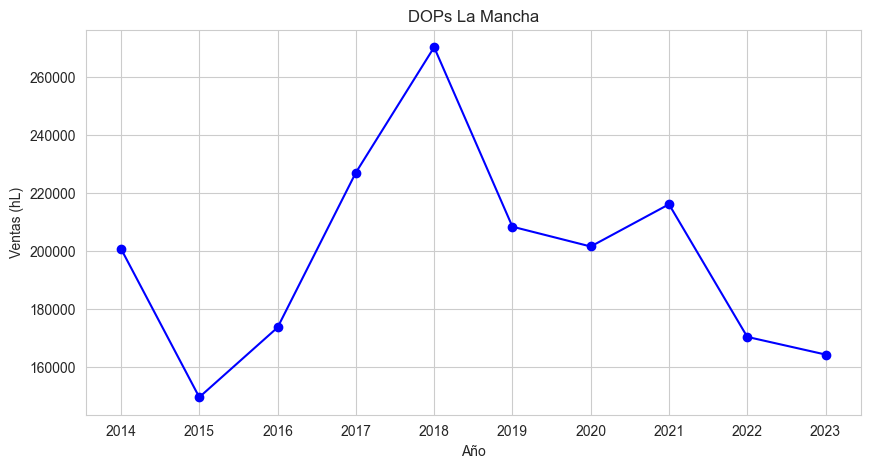

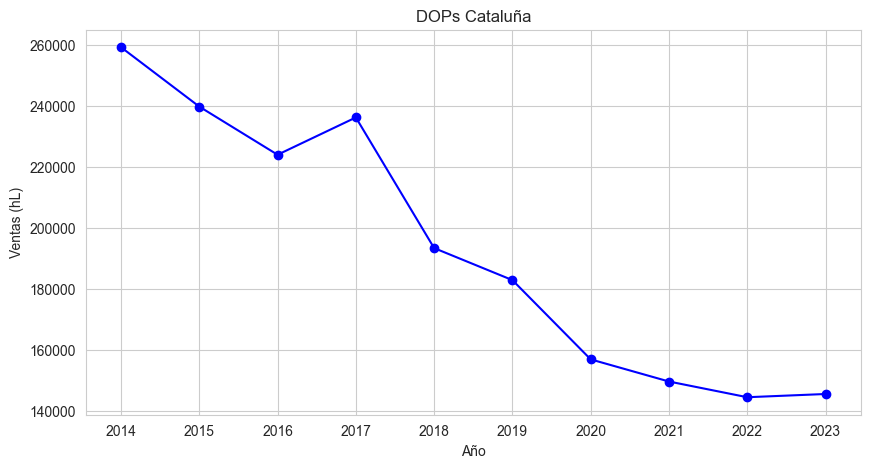

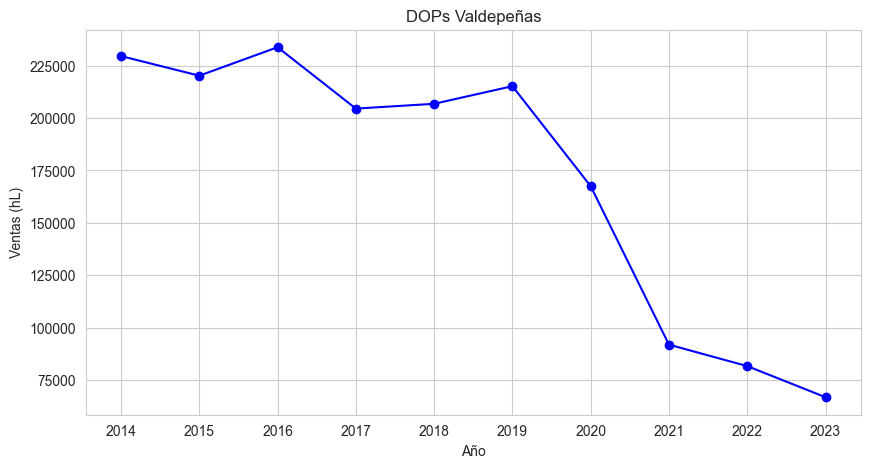

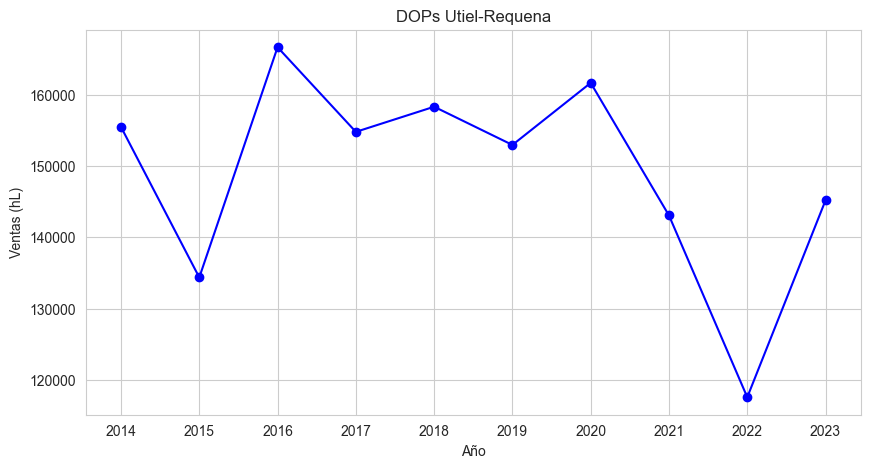

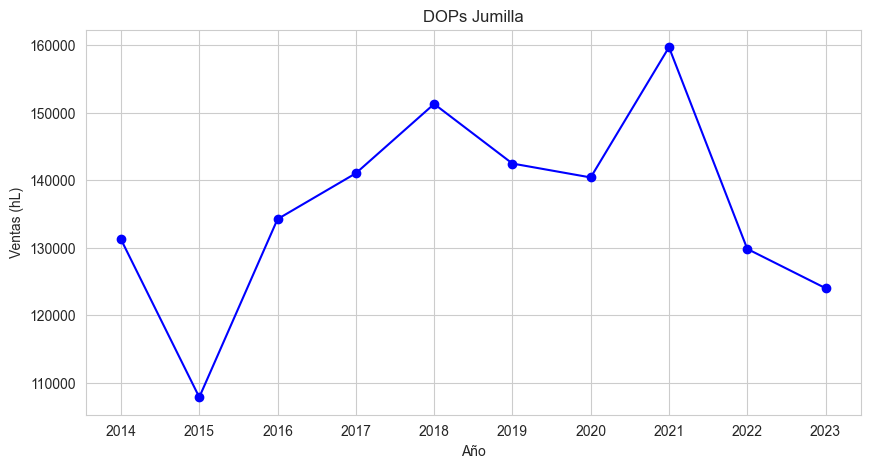

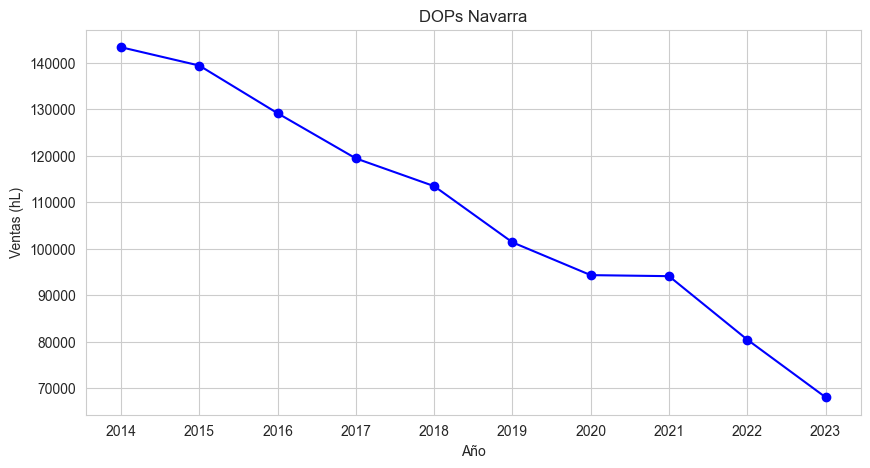

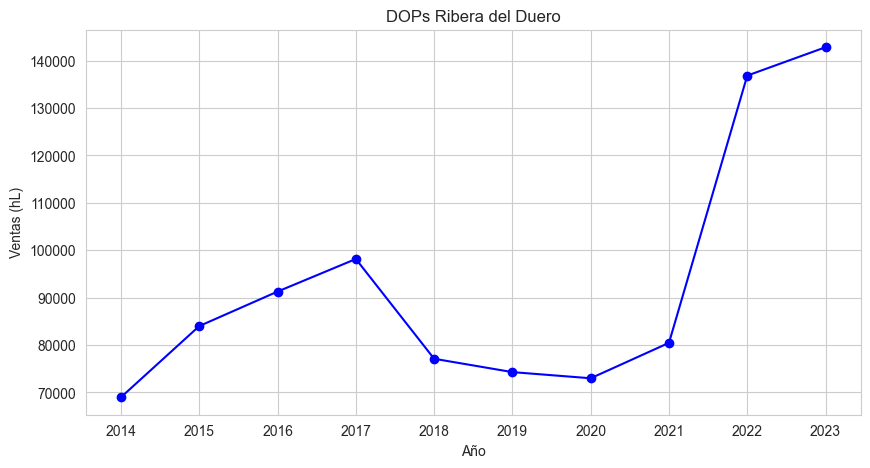

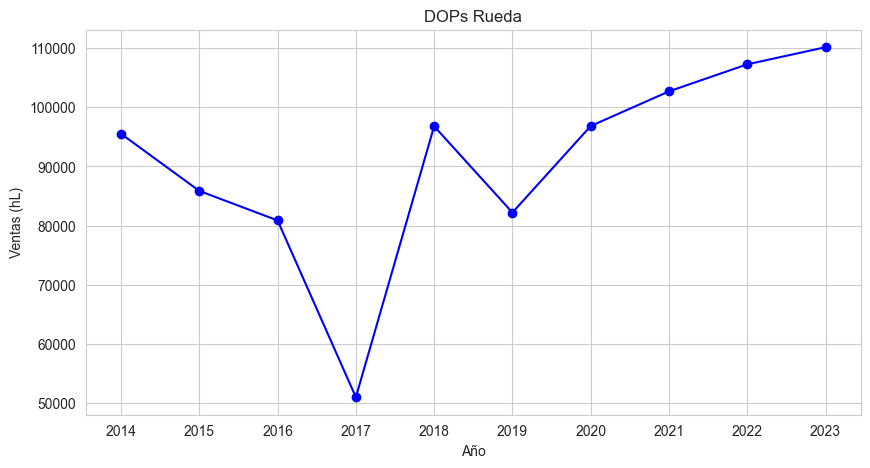

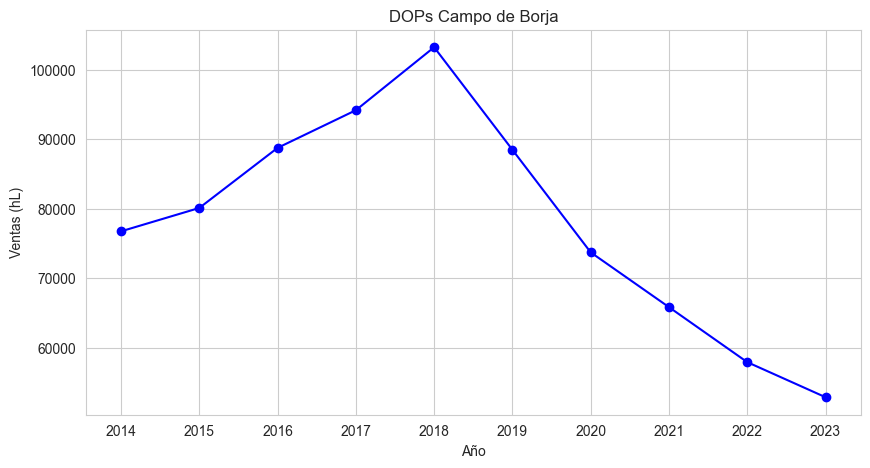

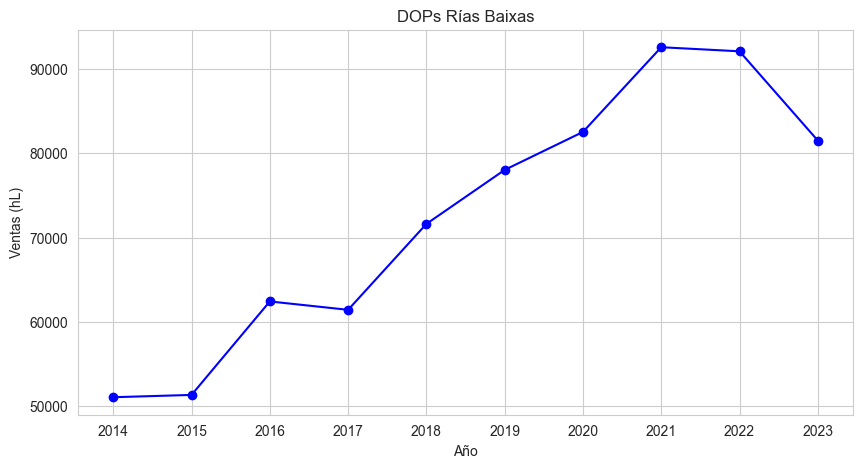

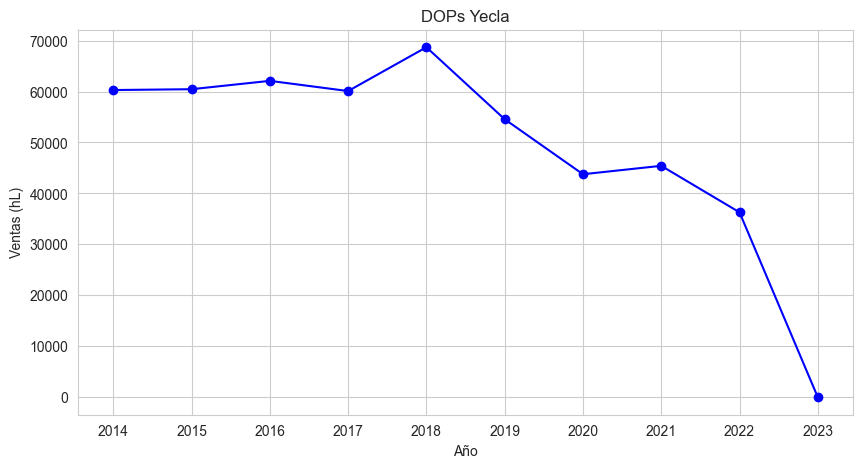

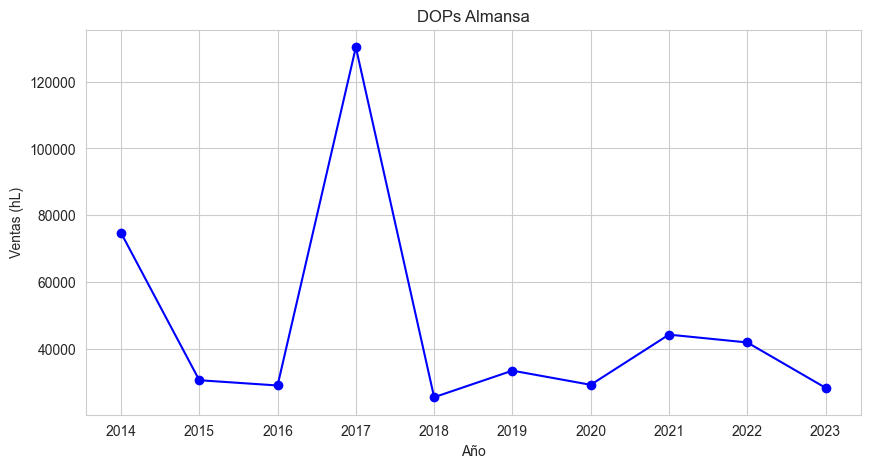

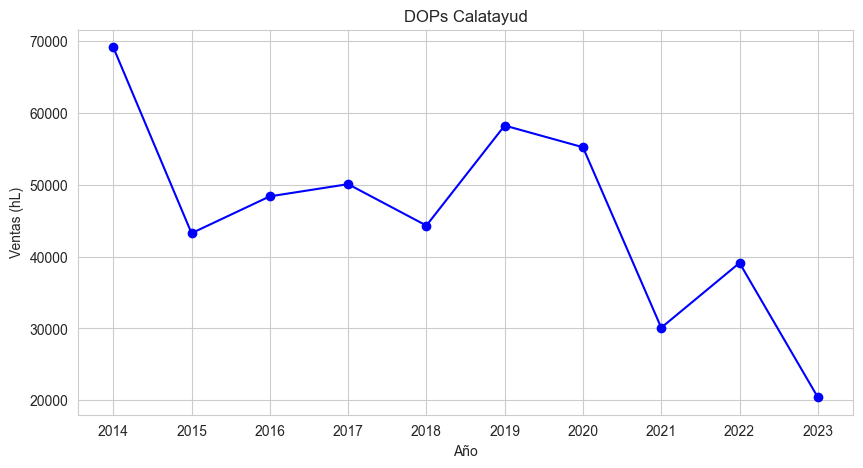

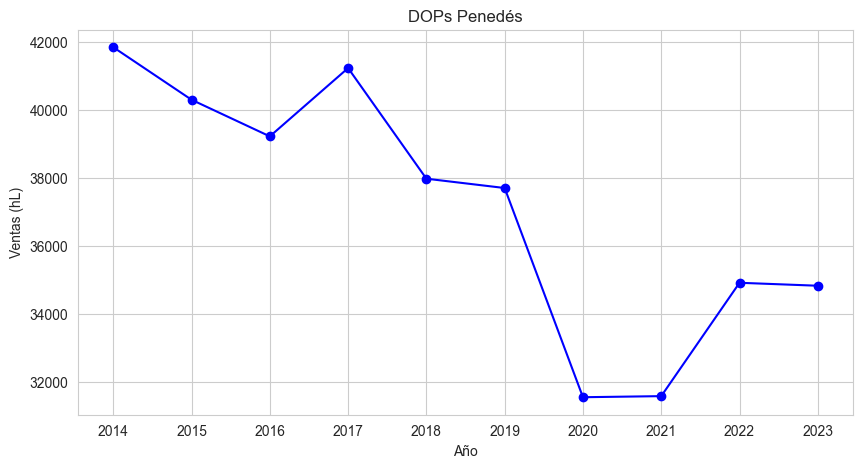

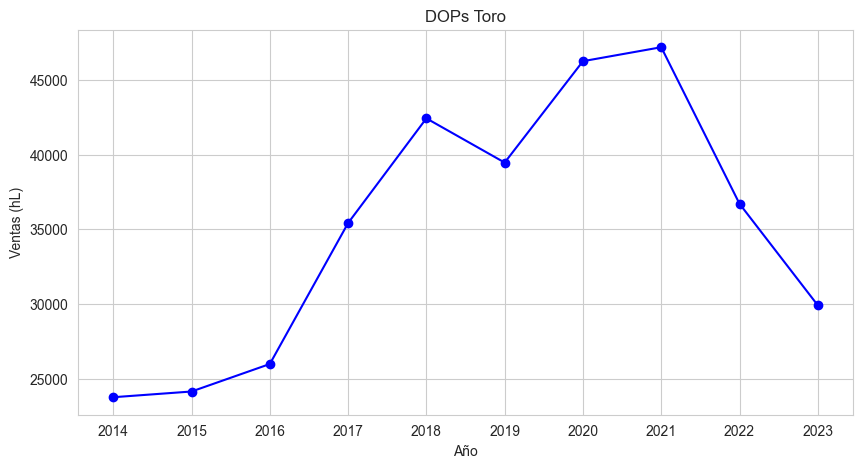

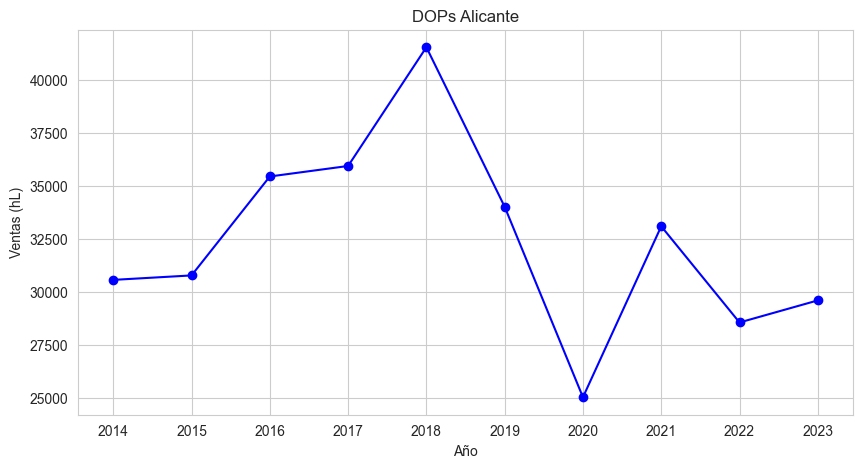

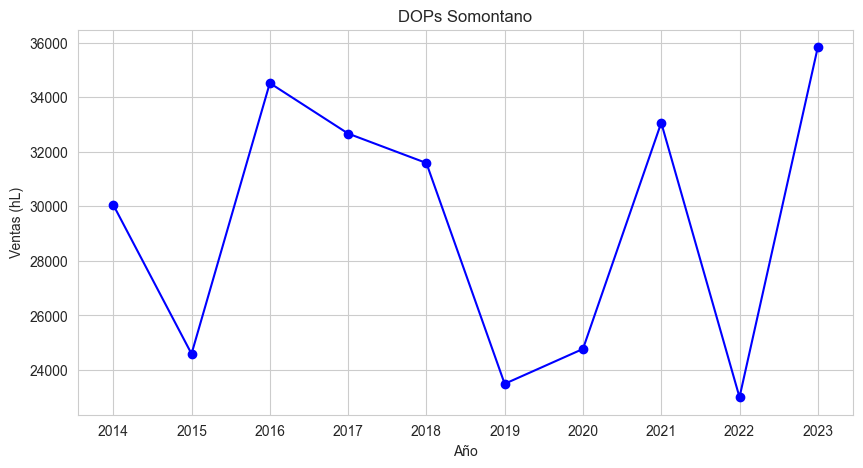

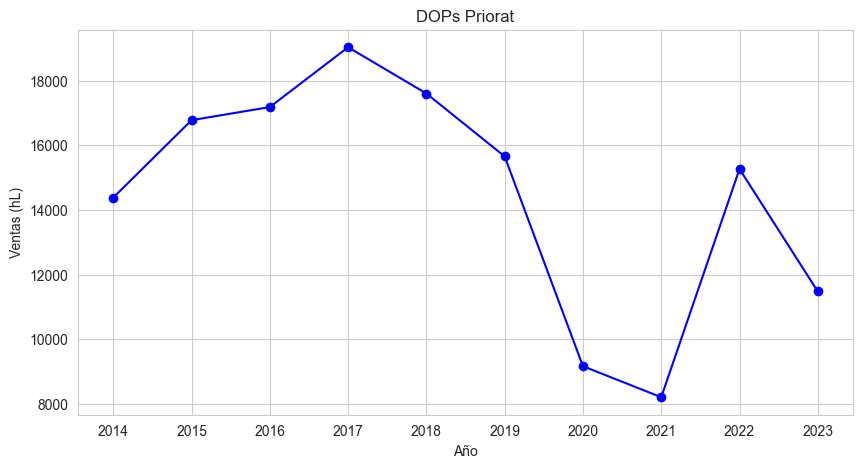

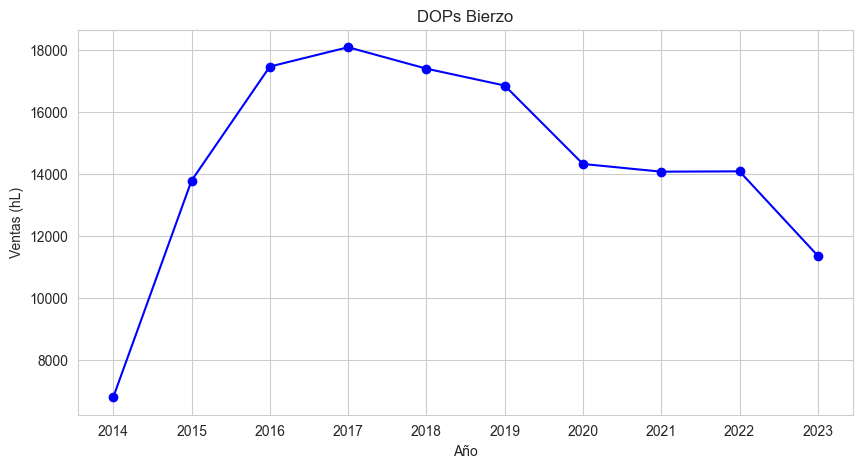

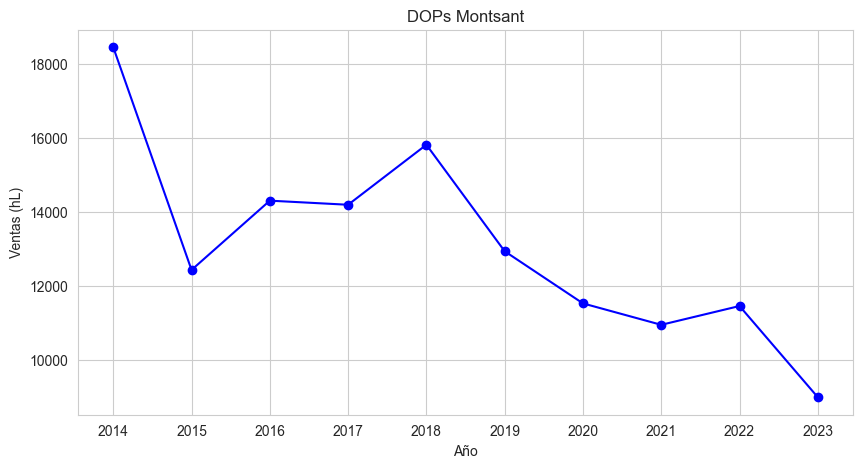

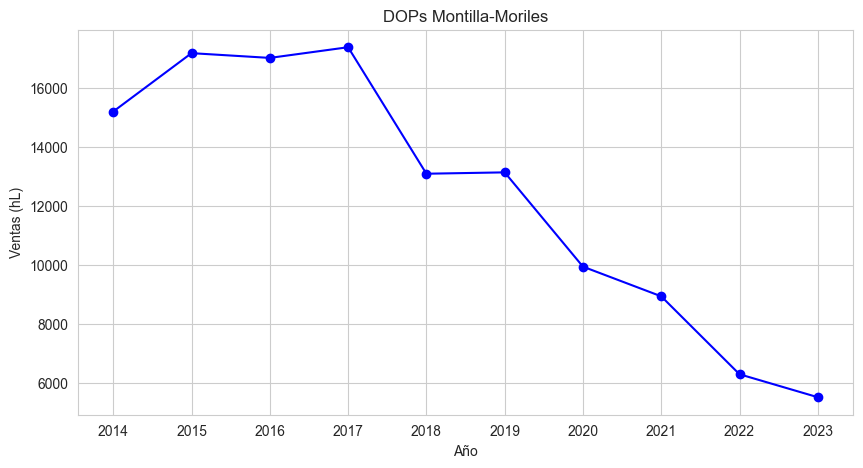

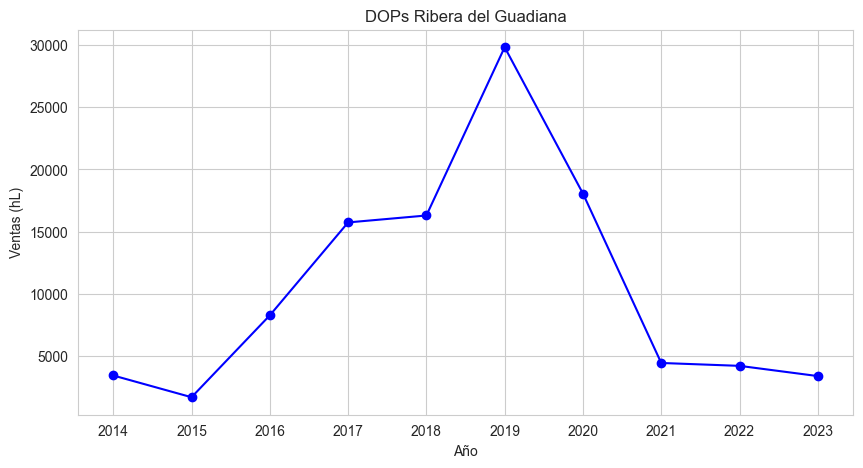

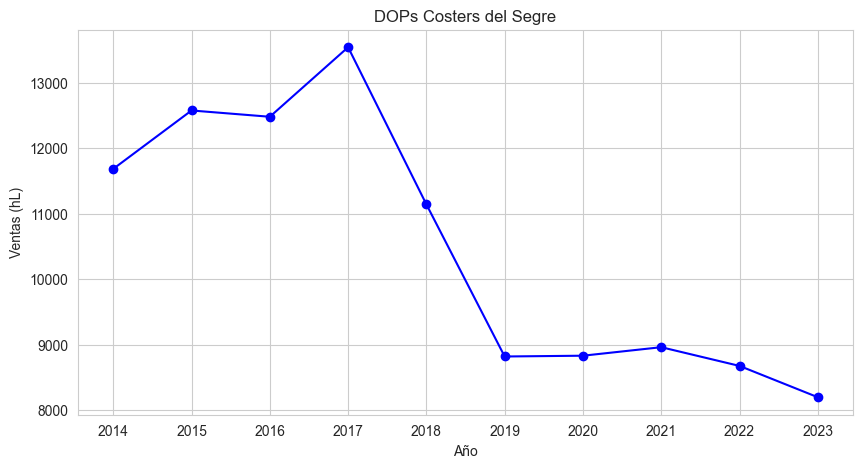

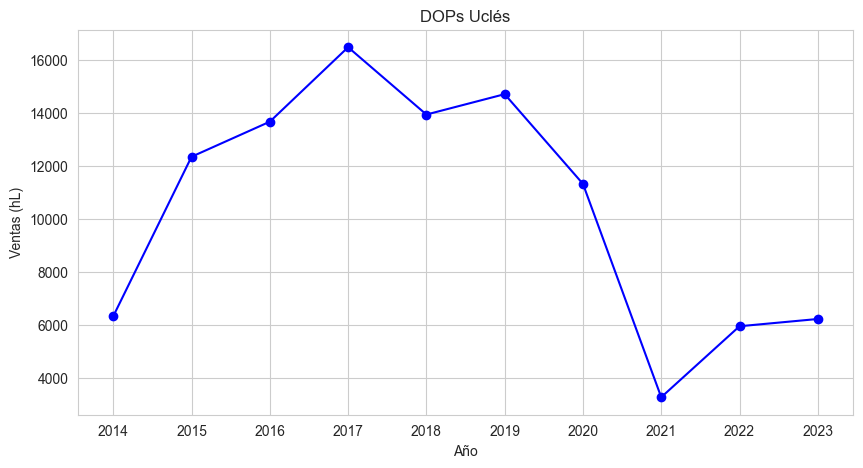

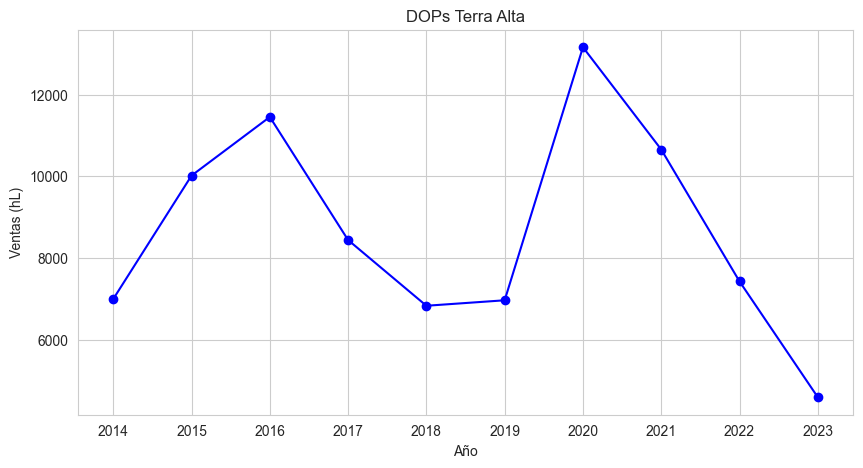

In [46]:
# 1. Calcular las top 30 DOPs con mayores ventas totales
top_dops_treinta = df_melted.groupby('DOPs')['Ventas'].sum().nlargest(30).index

# 2. Filtrar solo esas DOPs
df_top_treintadops = df_melted[df_melted['DOPs'].isin(top_dops_treinta)]

# 3. Agrupar por DOP y Año para sumar las ventas
df_agg_treintadops = df_top_treintadops.groupby(['DOPs', 'Año'])['Ventas'].sum().reset_index()

# 4. Crear gráficos individuales
sns.set_style("whitegrid")

for dop in top_dops_treinta:
    plt.figure(figsize=(10, 5))
    subset = df_agg_treintadops[df_agg_treintadops['DOPs'] == dop]
    plt.plot(subset['Año'], subset['Ventas'], marker='o', linestyle='-', color='b')
    plt.title(f"DOPs {dop}")
    plt.xlabel("Año")
    plt.ylabel("Ventas (hL)")
    plt.grid(True)

    plt.show()

### Correlaciones entre países a los que más se exporta y las DOPs más exportadas

In [48]:
# Creación de tabla de los países que más exportan para poder usarla en la matriz de correlaciones
# Sumar las ventas por país
ventas_por_pais_total = df_exportacion_spain.groupby('País')['Ventas'].sum()

# Ordenar los países por el total de ventas (de mayor a menor)
top_10_paises_total = ventas_por_pais_total.sort_values(ascending=False).head(10)

# Asegurarnos de que estamos usando los nombres de los países y no los valores de las ventas
top_10_paises_total_lista = top_10_paises_total.index.tolist()

# Mostrar el top 10 de países importadores
print("🔹 Top 10 países importadores:\n")
print(top_10_paises_total)

🔹 Top 10 países importadores:

País
Reino Unido    8670149
Alemania       7466582
EE.UU.         4529983
Bélgica        3078209
Holanda        2718661
China          2270901
Francia        1662284
Canadá         1662020
Suiza          1658376
Rusia          1485981
Name: Ventas, dtype: int64


In [49]:
#Matriz de contingencia para ver patrones 10 países top y 30 DOPs top
#Suponiendo que tu DataFrame se llama df y tiene las columnas: 'DOP', 'País', 'Ventas (hL)'

df_para_tabla_matriz_dop_paises = df_exportacion_spain[df_exportacion_spain['DOPs'].isin(top_dops_treinta) & df_exportacion_spain['País'].isin(top_10_paises_total_lista)]
#top_10_paises_total

# Crear una tabla cruzada (matriz de contingencia)
tabla_matriz_dop_paises = df_para_tabla_matriz_dop_paises.pivot_table(index="País", columns="DOPs", values="Ventas", aggfunc="sum", fill_value=0)

# Mostrar la tabla
print("🔹 Matriz de contingencia: países vs. DOPs\n")
print(tabla_matriz_dop_paises)

🔹 Matriz de contingencia: países vs. DOPs

DOPs         Alicante  Almansa  Bierzo  Calatayud  Campo de Borja  Cariñena  \
País                                                                          
Alemania        74657    38926   28521      22567           69045    495863   
Bélgica         13082     5172    4818       7034           16517     48008   
Canadá           9150    90500    9949      32632           86483    203639   
China           39731    33933   10020       8077           98550    172815   
EE.UU.          31491    25920   31022     158442          138823    193072   
Francia         19260     1250    2480      34642            4232     48528   
Holanda         12970    10739    7684       9924           32413     69814   
Reino Unido      7614     2487    8384       8502          175536    480841   
Rusia            3966     1993    3998       9346           24578    184281   
Suiza            7361     7133    5315      12910           10646     22960   

DOPs    

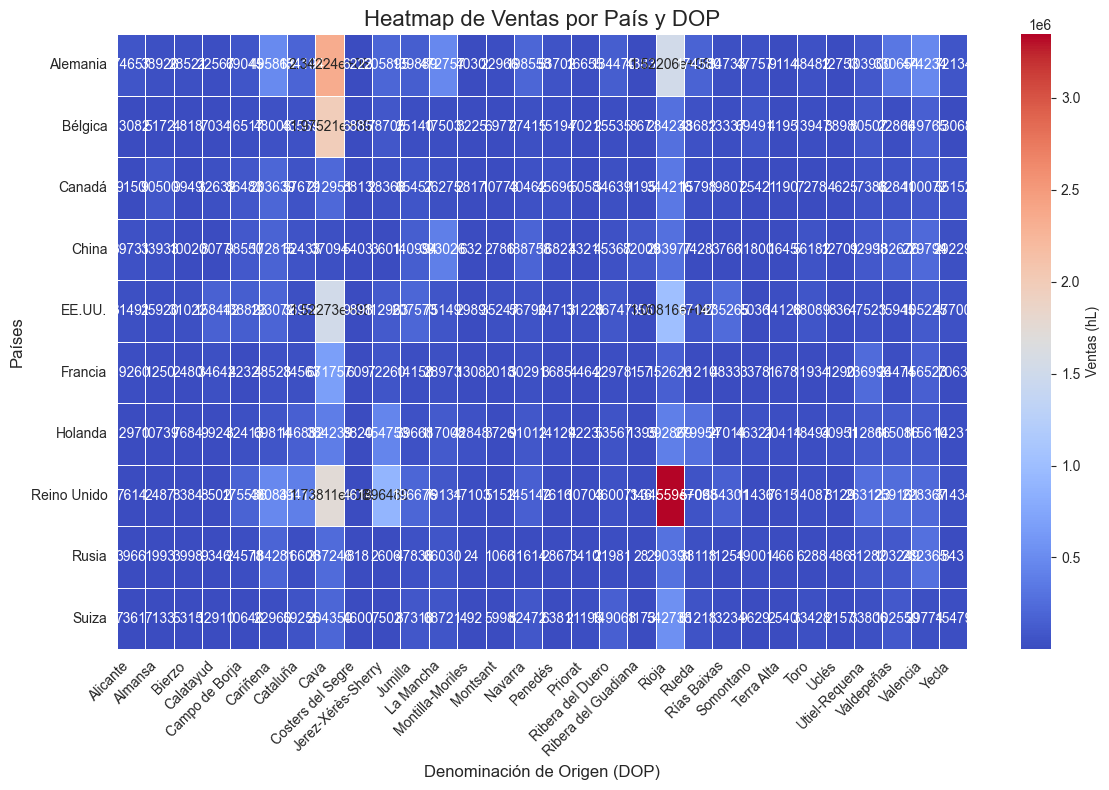

In [50]:
# Crear el gráfico de calor (heatmap)
plt.figure(figsize=(12, 8))  # Ajustar el tamaño del gráfico
sns.heatmap(tabla_matriz_dop_paises, annot=True, cmap="coolwarm", fmt="g", linewidths=0.5, cbar_kws={'label': 'Ventas (hL)'})

# Añadir títulos y etiquetas
plt.title('Heatmap de Ventas por País y DOP', fontsize=16)
plt.xlabel('Denominación de Origen (DOP)', fontsize=12)
plt.ylabel('Países', fontsize=12)
plt.xticks(rotation=45, ha='right')
# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [51]:
#Matriz de contingencia para ver patrones 10 países top y 15 primeras DOPs top para mejorar la visualización 
#Suponiendo que tu DataFrame se llama df y tiene las columnas: 'DOP', 'País', 'Ventas (hL)'

top15pr_dops = df_exportacion_spain.groupby('DOPs')['Ventas'].sum().nlargest(15).index

df_para_tabla_matriz_dop15pr_paises = df_exportacion_spain[df_exportacion_spain['DOPs'].isin(top15pr_dops) & df_exportacion_spain['País'].isin(top_10_paises_total_lista)]
#top_10_paises_total

# Crear una tabla cruzada (matriz de contingencia)
tabla_matriz_dop15pr_paises = df_para_tabla_matriz_dop15pr_paises.pivot_table(index="País", columns="DOPs", values="Ventas", aggfunc="sum", fill_value=0)

# Mostrar la tabla
print("🔹 Matriz de contingencia: países vs. DOPs\n")
print(tabla_matriz_dop15pr_paises)

🔹 Matriz de contingencia: países vs. DOPs

DOPs         Campo de Borja  Cariñena  Cataluña     Cava  Jerez-Xérès-Sherry  \
País                                                                           
Alemania              69045    495863    184194  2342236              205895   
Bélgica               16517     48008     43569  1975213               78705   
Canadá                86483    203639     57679   212951               28368   
China                 98550    172815     52433    37094                3601   
EE.UU.               138823    193072     36956  1522730              112963   
Francia                4232     48528     34563   671757               72260   
Holanda               32413     69814    146882   384239              454753   
Reino Unido          175536    480841    394122  1738108              896489   
Rusia                 24578    184281     16606   237246                2606   
Suiza                 10646     22960     59255   204350                7502 

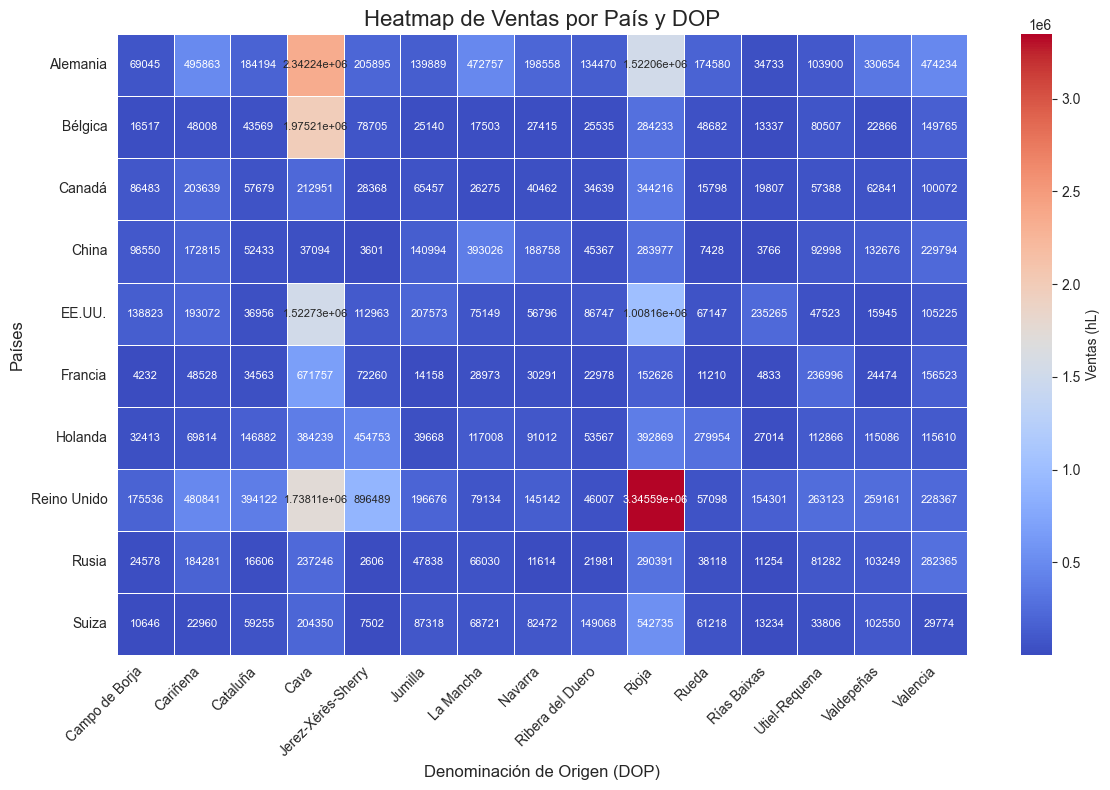

In [52]:
# Crear el gráfico de calor (heatmap)
plt.figure(figsize=(12, 8))  # Ajustar el tamaño del gráfico
sns.heatmap(tabla_matriz_dop15pr_paises, annot=True, cmap="coolwarm", fmt="g", linewidths=0.5, cbar_kws={'label': 'Ventas (hL)'},annot_kws={"size":8})

# Añadir títulos y etiquetas
plt.title('Heatmap de Ventas por País y DOP', fontsize=16)
plt.xlabel('Denominación de Origen (DOP)', fontsize=12)
plt.ylabel('Países', fontsize=12)
plt.xticks(rotation=45, ha='right')
# Mostrar el gráfico
plt.tight_layout()
plt.show()

##### La DOPs que más se exporta por exelencia es 'Rioja' y concretamente a Reino Unido. También Cava tiene buen nivel de exportación a Alemania, Bélgica, Estados Unidos y Reino Unido.

In [53]:
#Matriz de contingencia para ver patrones 10 países top y 15 segundas DOPs top para mejorar la visualización 
#Suponiendo que tu DataFrame se llama df y tiene las columnas: 'DOP', 'País', 'Ventas (hL)'

undertop15_dops = top_dops_treinta[15:]

df_para_tabla_matriz_undertop_dop15_paises = df_exportacion_spain[df_exportacion_spain['DOPs'].isin(undertop15_dops) & df_exportacion_spain['País'].isin(top_10_paises_total_lista)]
#top_10_paises_total

# Crear una tabla cruzada (matriz de contingencia)
tabla_matriz_undertop15_dops_paises = df_para_tabla_matriz_undertop_dop15_paises.pivot_table(index="País", columns="DOPs", values="Ventas", aggfunc="sum", fill_value=0)

# Mostrar la tabla
print("🔹 Matriz de contingencia: países vs. DOPs\n")
print(tabla_matriz_undertop15_dops_paises)

🔹 Matriz de contingencia: países vs. DOPs

DOPs         Alicante  Almansa  Bierzo  Calatayud  Costers del Segre  \
País                                                                   
Alemania        74657    38926   28521      22567               6223   
Bélgica         13082     5172    4818       7034               6885   
Canadá           9150    90500    9949      32632               8813   
China           39731    33933   10020       8077               5403   
EE.UU.          31491    25920   31022     158442               9898   
Francia         19260     1250    2480      34642                609   
Holanda         12970    10739    7684       9924               8820   
Reino Unido      7614     2487    8384       8502               4614   
Rusia            3966     1993    3998       9346                818   
Suiza            7361     7133    5315      12910               4600   

DOPs         Montilla-Moriles  Montsant  Penedés  Priorat  \
País                           

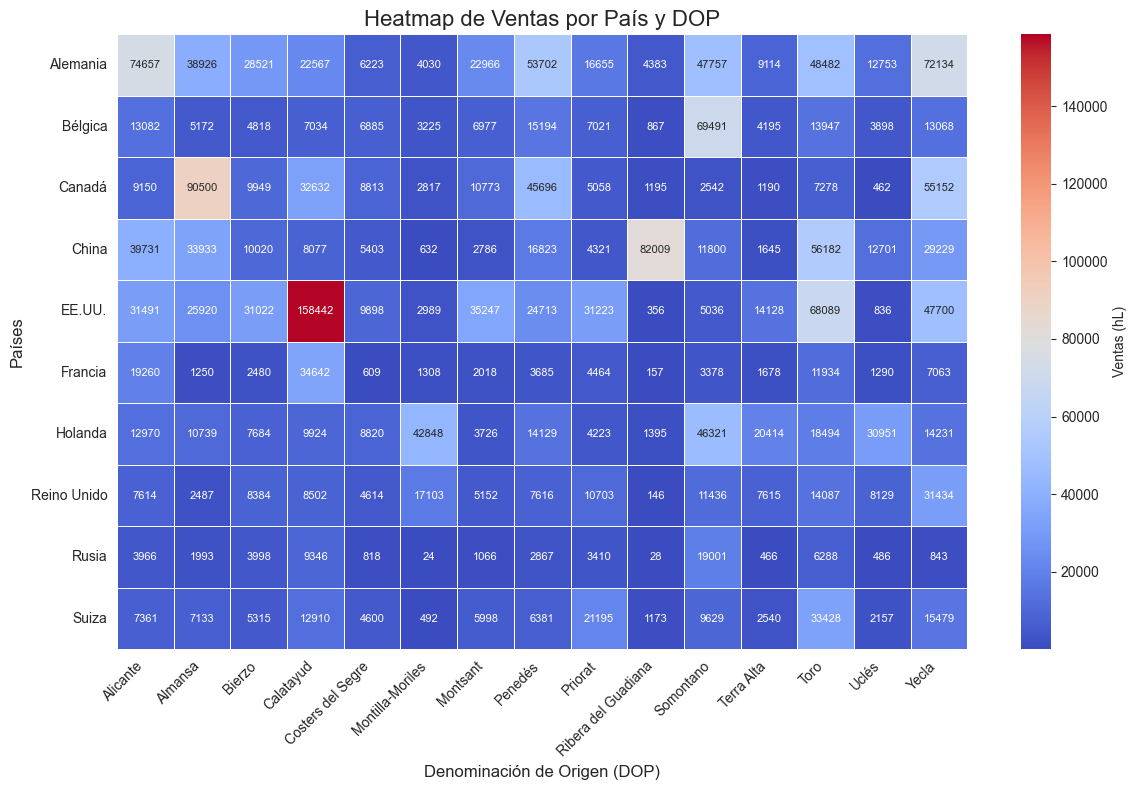

In [55]:
# Crear el gráfico de calor (heatmap)
plt.figure(figsize=(12, 8))  # Ajustar el tamaño del gráfico
sns.heatmap(tabla_matriz_undertop15_dops_paises, annot=True, cmap="coolwarm", fmt="g", linewidths=0.5, cbar_kws={'label': 'Ventas (hL)'},annot_kws={"size": 8})

# Añadir títulos y etiquetas
plt.title('Heatmap de Ventas por País y DOP', fontsize=16)
plt.xlabel('Denominación de Origen (DOP)', fontsize=12)
plt.ylabel('Países', fontsize=12)
plt.xticks(rotation=45, ha='right')
# Mostrar el gráfico
plt.tight_layout()
plt.show()

##### La diferencia entre las 15 DOPs más vendidas y las segundas 15 DOPs más vendidas en cuanto a exportación es clara. 

### Tabla de relaciones más fuertes entre DOPs y países

In [61]:
# Visualización de las relaciones más fuertes entre DOPs y países
# Apilar la tabla para ver las relaciones DOPs-Países
tabla_topdop_top_paises = tabla_matriz_dop_paises.stack().reset_index(name='Ventas')

# Ordenar las combinaciones por las ventas en orden descendente
tabla_topdop_top_paises_sorted = tabla_topdop_top_paises.sort_values(by='Ventas', ascending=False)

# Obtener el número deseado de relaciones
relaciones_topdop_toppaises = tabla_topdop_top_paises_sorted.head(20)

# Mostrar las relaciones más fuertes
print(relaciones_topdop_toppaises)

            País                DOPs   Ventas
229  Reino Unido               Rioja  3345587
7       Alemania                Cava  2342236
37       Bélgica                Cava  1975213
217  Reino Unido                Cava  1738108
127       EE.UU.                Cava  1522730
19      Alemania               Rioja  1522063
139       EE.UU.               Rioja  1008155
219  Reino Unido  Jerez-Xérès-Sherry   896489
157      Francia                Cava   671757
289        Suiza               Rioja   542735
5       Alemania            Cariñena   495863
215  Reino Unido            Cariñena   480841
28      Alemania            Valencia   474234
11      Alemania           La Mancha   472757
189      Holanda  Jerez-Xérès-Sherry   454753
216  Reino Unido            Cataluña   394122
101        China           La Mancha   393026
199      Holanda               Rioja   392869
187      Holanda                Cava   384239
79        Canadá               Rioja   344216


##### Aquí se observa de manera numérica a que país se exporta más y que DOP es la más demandada por país. Son las 30 relaciones más fuertes de país exportador - DOPs. 

### Conclusiones

##### Recomendable afianzar la relación de exportación con Japón y Francia ya que hay variaciones en la comercialización muy agudas. En cuanto al mercado de Rusia y Suecia se mantiene a nivel constante, Suecia tiene un crecimiento del consumo de vino español que va creciendo paulatinamente
##### El 54% de las exportaciones españolas se concentran en las DOPs Cava, Rioja y Valencia, siendo Cava y Rioja las DOPs que más se exportan con diferencia, un 26,06% y un 21,82% respectivamente. 
##### No cerrarse en la exportación de las DOPs Cava y Rioja pese a que ostentan el 50% de las exportaciones a nivel mundial. Aprovechar la apertura de nuevos mercados para la comercialización así ganar presencia de las DOPs que no tienen tanto nivel de exportación.
